
# Perkenalan
---

Nama : Muhammad Afif Alvan

Batch: FTDS-016-rmt

Assigment : Graduated Challange 4

## Query
---

## Description
---

Data ini berisikan informasi pengunaan kartu kredit selama 6 bulan terakhir dari customer di suatu bank

## Objective
---

Membuat model clustering untuk melakukan customer segmentation dari data yang berisikan record penggunaan kartu kredit selama 6 bulan terakhir.

# Import Libraries
---

In [413]:

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# handling outlier
from feature_engine.outliers import Winsorizer
# Scaling
from sklearn.preprocessing import MinMaxScaler

# Reduction Dimention
from sklearn.decomposition import PCA

# Modeling Data clustering
from sklearn.cluster import KMeans, AgglomerativeClustering as AC, SpectralClustering
# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Training Model

from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# metric
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from yellowbrick.cluster import KElbowVisualizer




# Data Loading
---

Data ini nantinya akan dibagi kedalam dua bagian:

1. Data Inference = 20 Data sampel Acak
2. Data Latih = selain data inference

In [414]:
# Loading Data with Pandas
df = pd.read_csv('hdsft_P1G4_Muhammad_Afif_Alvan.csv')

In [415]:
# Display Head of Data
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [416]:
# Display Tail of Data
df.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [417]:
# Dimension of Data
print(df.shape)

(4475, 18)


- Data ini memiliki `4.475 row` dan `18 columns`

In [418]:
# Attribute Cheking Values
attributes = df.columns.values
print(attributes)

['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


- Kolom yang terdapat pada dataset

In [419]:
# Rename Columns

df.rename(columns = {
       'ONEOFF_PURCHASES_FREQUENCY' : 'FREQ_PEMBELIAN',
       'PURCHASES_INSTALLMENTS_FREQUENCY' : 'FREQ_CICILAN',
       'CASH_ADVANCE_FREQUENCY' : 'FREQ_UANG_MUKA',
}, inplace=True)

In [420]:
# Checking type from Attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 4475 non-null   int64  
 1   BALANCE                 4475 non-null   float64
 2   BALANCE_FREQUENCY       4475 non-null   float64
 3   PURCHASES               4475 non-null   float64
 4   ONEOFF_PURCHASES        4475 non-null   float64
 5   INSTALLMENTS_PURCHASES  4475 non-null   float64
 6   CASH_ADVANCE            4475 non-null   float64
 7   PURCHASES_FREQUENCY     4475 non-null   float64
 8   FREQ_PEMBELIAN          4475 non-null   float64
 9   FREQ_CICILAN            4475 non-null   float64
 10  FREQ_UANG_MUKA          4475 non-null   float64
 11  CASH_ADVANCE_TRX        4475 non-null   int64  
 12  PURCHASES_TRX           4475 non-null   int64  
 13  CREDIT_LIMIT            4474 non-null   float64
 14  PAYMENTS                4475 non-null   

- Pada dataset ini terdiri dari `4.475 jumlah data` dengan `18 columns`. Dengan `4 int` feature dan `14 float` feature.


In [421]:
# Check Dataset
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4476.000000   1565.743939           0.877608   1003.158324   
std    2583.931114   2091.205727           0.235604   2210.812899   
min       2.000000      0.000000           0.000000      0.000000   
25%    2239.000000    132.536353           0.888889     40.065000   
50%    4476.000000    874.905296           1.000000    362.480000   
75%    6713.000000   2058.519163           1.000000   1122.640000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         588.504849              415.025075    973.453671   
std         1666.500287              927.360842   2133.464502   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           29.990000               89.450000      0.000000   
75%          580.320000              484.255000   1098.569962   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  FREQ_PEMBELIAN  FREQ_CICILAN  FREQ_UANG_MUKA  \
count          4475.000000     4475.000000   4475.000000     4475.000000   
mean              0.490122        0.202614      0.364989        0.134156   
std               0.399874        0.298502      0.397336        0.199221   
min               0.000000        0.000000      0.000000        0.000000   
25%               0.083333        0.000000      0.000000        0.000000   
50%               0.500000        0.083333      0.166667        0.000000   
75%               0.916667        0.333333      0.750000        0.181818   
max               1.000000        1.000000      1.000000        1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4474.000000   4475.000000   
mean           3.196425      14.490503   4494.020175   1726.212274   
std            6.500169      24.156038   3668.535689   2961.258570   
min            0.000000       0.000000    150.000000      0.000000   
25%            0.000000       1.000000   1500.000000    390.206371   
50%            0.000000       7.000000   3000.000000    831.048408   
75%            4.000000      17.000000   6000.000000   1895.959003   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4317.000000       4475.000000  4475.000000  
mean         854.429538          0.157206    11.516425  
std         2306.411178          0.295869     1.347819  
min            0.037744          0.000000     6.000000  
25%          169.814310          0.000000    12.000000  
50%          309.854995          0.000000    12.000000  
75%          830.395060          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

- Pada data `credit_card_information` diketahui ada beberapa customer yang tidak memiliki saldo pada akun bank nya. Dan data menunjukan rata-rata customer memiliki saldo yang tersisi untuk melakukan pembelian sebesar `1.565`
- jangka waktu layanan yang tersisa dari customer id paling lambat adalah `6 bulan` dan paling lama `1 tahun`
- Limit dari credit card yang diberikan bank paling sedikit adalah `150` dan paling besar sebesar `30.000`.

# Exploratory Data Analysis (EDA)
---

## Data Description




**Keterangan:**

- CUST_ID : Identitas Pemilik kartu kredit
- BALANCE : Jumlah sisa saldo untuk pembelian
- BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PURCHASES : Jumlah pembelian 
- ONEOFF_PURCHASES : Jumlah pembelian maksimum dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian secara mencicil
- CASH_ADVANCE : Uang tunai di muka yang diberikan oleh pengguna
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- FREQ_PEMBELIAN : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- FREQ_CICILAN: Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
- FREQ_UANG_MUKA : Seberapa sering uang tunai di muka dibayarkan
- CASH_ADVANCE_TRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT : Batas Kartu Kredit untuk pengguna
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
- MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna
- PRC_FULL_PAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- TENURE : Jangka waktu layanan kartu kredit untuk pengguna


## Feature Selection

<AxesSubplot: >

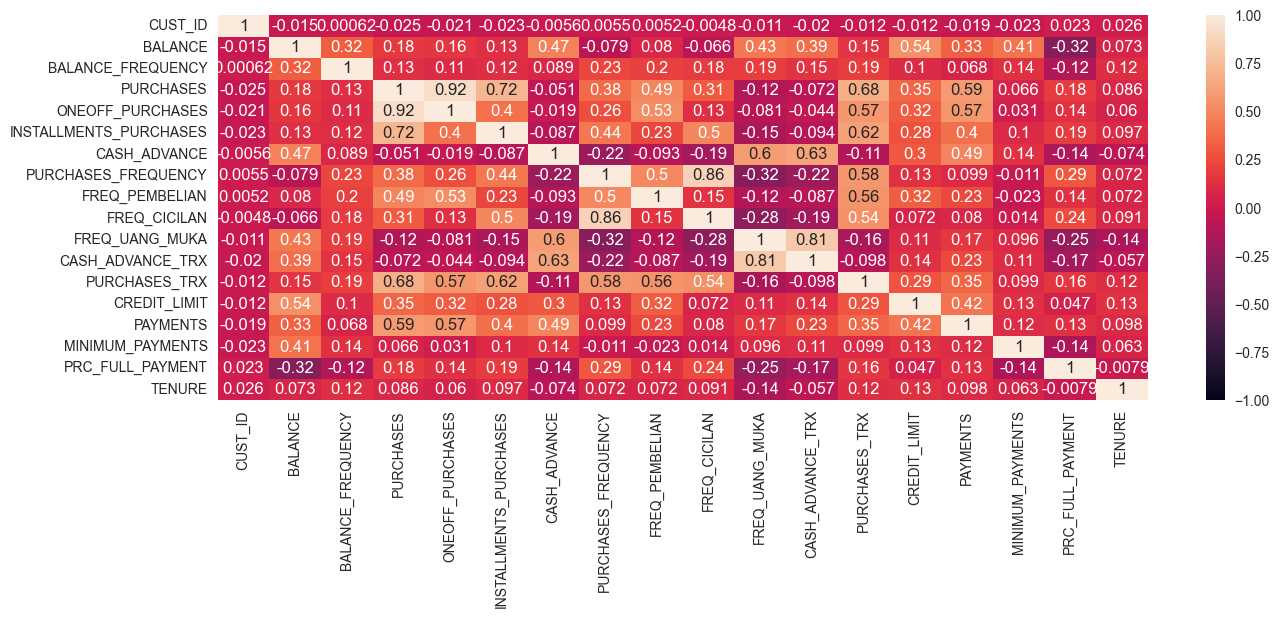

In [422]:
# heatmap correlation
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), vmax=1, vmin= -1, annot = True )

Pada visualisasi heatmap dapat dilihat bahwa `cust_id` tidak memiliki korelasi dengan feature manapun, sehingga `cust_id` dapat dihilangkan dalam proses pembuatan model clustering untuk membuat customer segmentation.



## Visualization


### Balance with Purchases

<AxesSubplot: title={'center': 'Scatter Plot Balance vs Purchases'}, xlabel='BALANCE', ylabel='PURCHASES'>

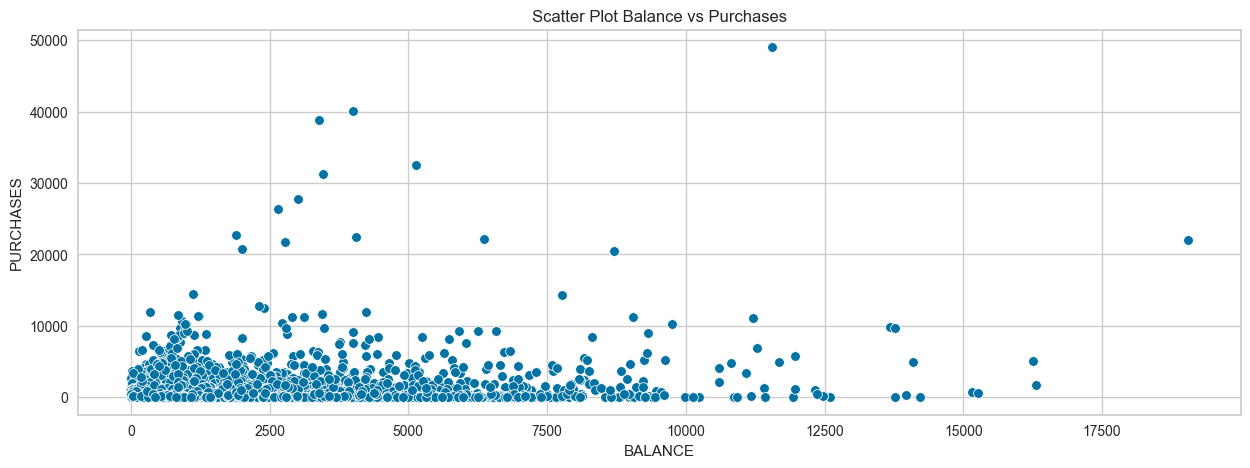

In [423]:
# Scatter plot
plt.figure(figsize=(15,5))
plt.title('Scatter Plot Balance vs Purchases')
sns.scatterplot(x=df['BALANCE'], y=df['PURCHASES'], data = df)

Dapat dilihat pada scatter plot ternyata `sisa saldo` tidak mempengaruhi jumlah pembelian yang dilakukan. Dimana ketika sisa saldo tinggi jumlah pembelian tetap rendah. Rata-rata para customer id memiliki saldo yang `rendah` serta memiliki pembelian yang sedikit.

### Credit Limit

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


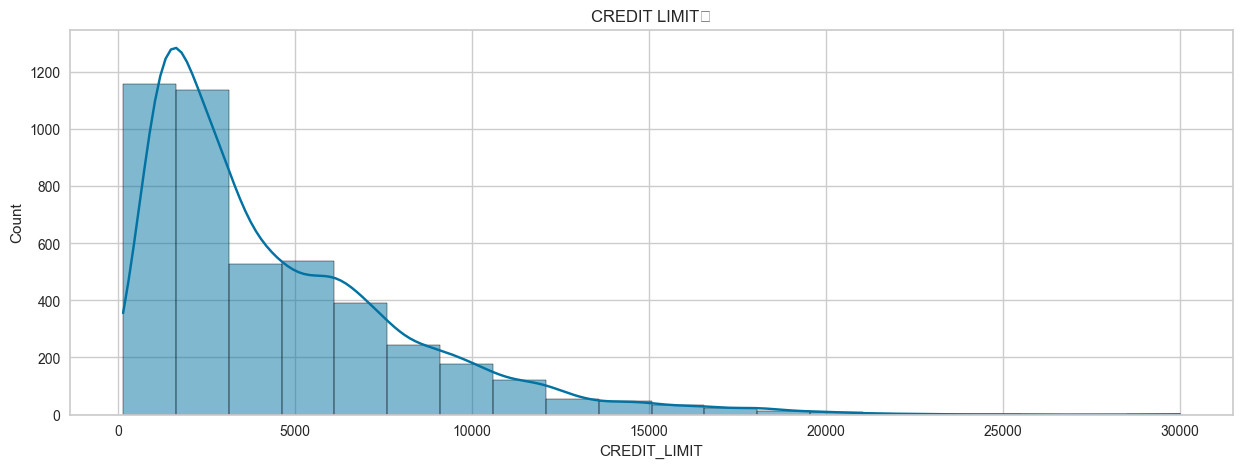

Mean Limit : 4494.020174927581


In [424]:
# Display Kredit Limit
plt.figure(figsize = (15, 5))
sns.histplot(df['CREDIT_LIMIT'], bins=20, kde=True)
plt.title('CREDIT LIMIT	')
plt.show()
print(f'Mean Limit : {df.CREDIT_LIMIT.mean()}')



- Terlihat bahwa nilai limit dari kartu kredit pada custemer di dataset berada pada rentang `0 sampai 30000 dollar` dengan rata-rata limit kartu kredit yang diberikan bank sebesar `4494 dollar`

### Payment

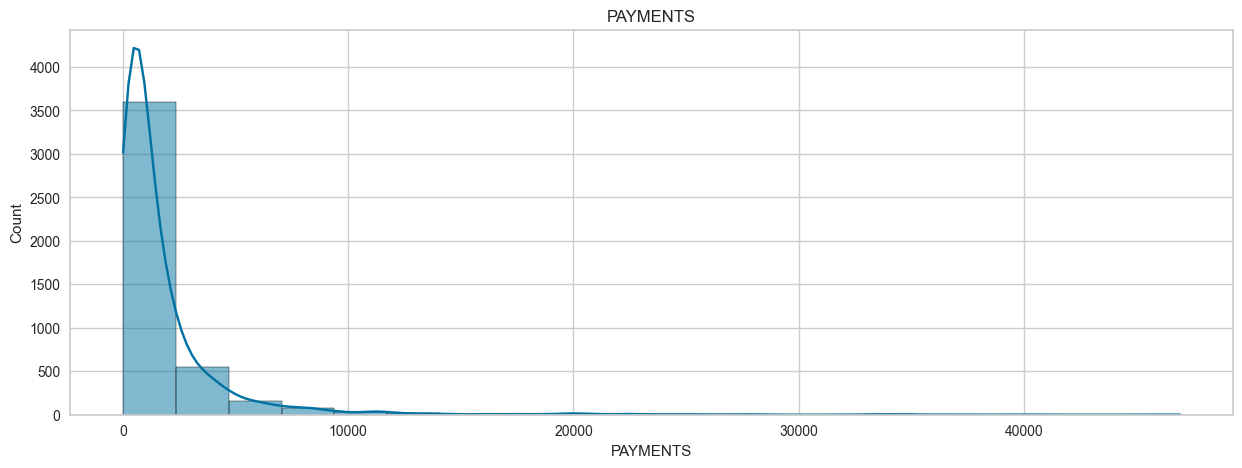

Mean PAYMENTS : 1726.2122738256985


In [425]:
plt.figure(figsize = (15, 5))
sns.histplot(df['PAYMENTS'], bins=20, kde=True)
plt.title('PAYMENTS')
plt.show()

print(f'Mean PAYMENTS : {df.PAYMENTS.mean()}')

- Rata -rata pembayaran yang dilakukan oleh customer bank adalah sebesar `1726 dollar`.

### Cash Advance

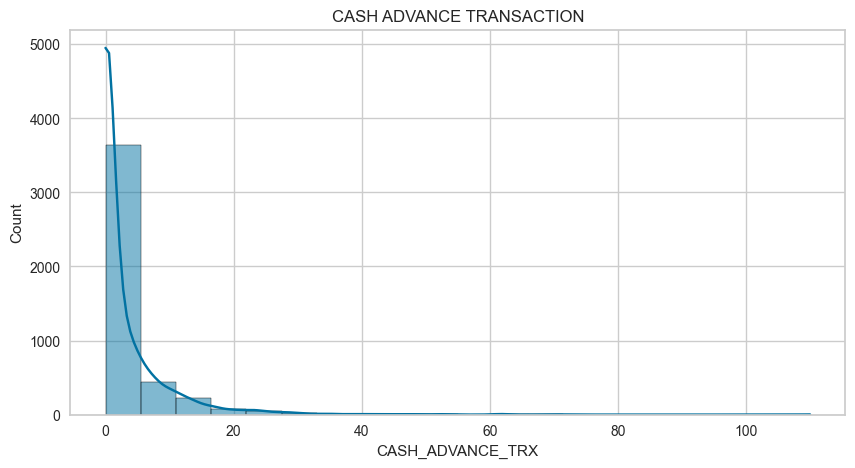

Mean Cash Advance Transaction : 3.1964245810055867


In [426]:
# Displat Cash Advance
plt.figure(figsize = (10, 5))
sns.histplot(df['CASH_ADVANCE_TRX'], bins=20, kde=True)
plt.title('CASH ADVANCE TRANSACTION')
plt.show()
print(f'Mean Cash Advance Transaction : {df.CASH_ADVANCE_TRX.mean()}')

- Terlihat pada visualisasi `CASH_ADVANCE_TRX` bahwa rata-rata jumlah transaksi yang dilakukan dengan menggunakan cash advance atau mengisi saldo terlebih dahulu adalah sebanyak `3 transaksi`

### Tenure

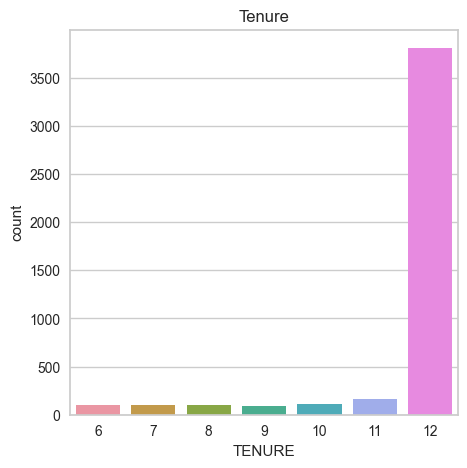

In [427]:
# Display Tenure
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="TENURE")
plt.title('Tenure')
plt.show()

- Dilihat pada visualisasi diatas bahwa jangka waktu yang dimiliki oleh setiap customer id paling banyak memiliki jangka waktu `12 bulan`.

### Create Function

In [428]:
# Distribution function visualization
def plots(df, variable):
    #create Canvas
    plt.figure(figsize=(15,5))
    
    #histogram
    plt.subplot(1,2,1)
    plt.title('Histogram ' + variable)
    sns.histplot(df[variable], color = 'b', bins = 5)
    
    
    #boxplot
    plt.subplot(1, 2, 2)
    plt.title('Boxplot ' + variable)
    sns.boxplot(y=df[variable], )
    

    plt.show()
    
    #skewness
    print(f'Nilai Skewness '+ variable,':', df[variable].skew())
    
# explorasi data function visualization
def explore(df, x):
    #create Canvas
    plt.figure(figsize=(15,5))

    #Pie Chart
    plt.title('Pie chart ' + x)
    plt.legend()
    df.groupby([x]).size().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.09], 
    cmap='winter',
    shadow=True,   
    )
           
    #barplot
    plt.figure(figsize=(15,5))
    df.groupby(x).agg({x:'count'}).plot(
        kind ='bar')
    plt.title('Barplot ')
    plt.legend()

    plt.show()

## Visualization for Distribution

In [429]:
# find a column values
features = df.columns.values
print(features)

['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'FREQ_PEMBELIAN' 'FREQ_CICILAN' 'FREQ_UANG_MUKA' 'CASH_ADVANCE_TRX'
 'PURCHASES_TRX' 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS'
 'PRC_FULL_PAYMENT' 'TENURE']


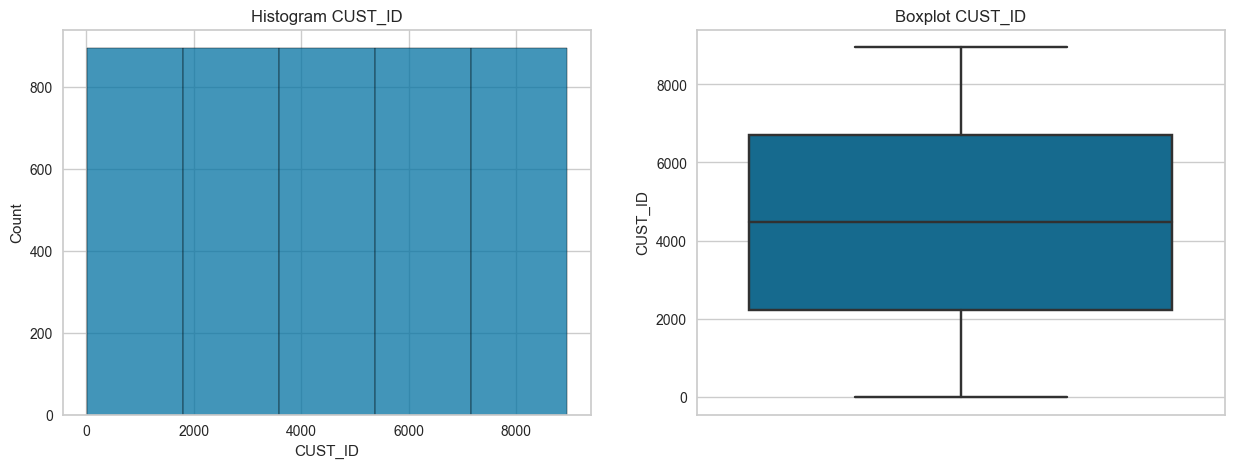

Nilai Skewness CUST_ID : 0.0


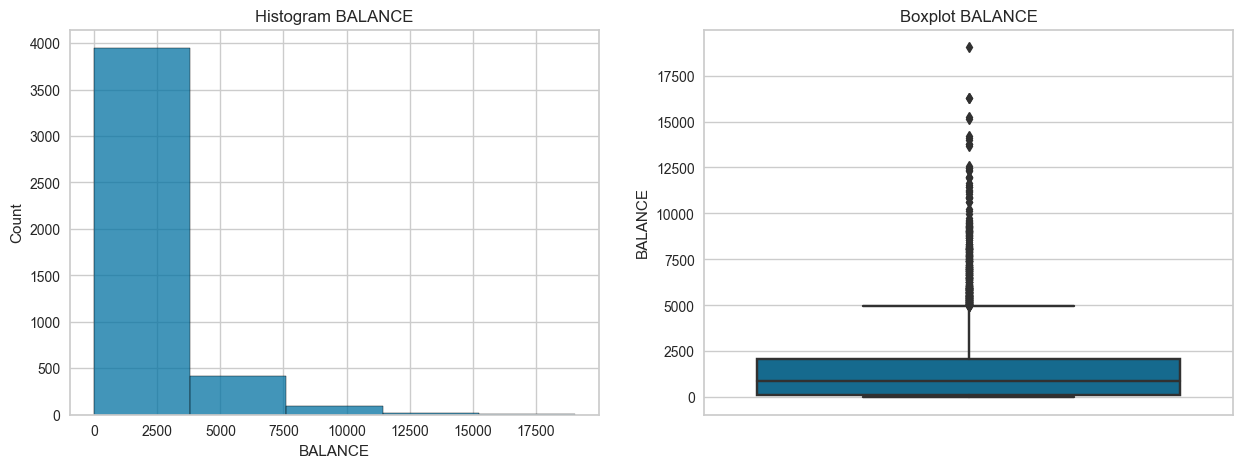

Nilai Skewness BALANCE : 2.456620962191608


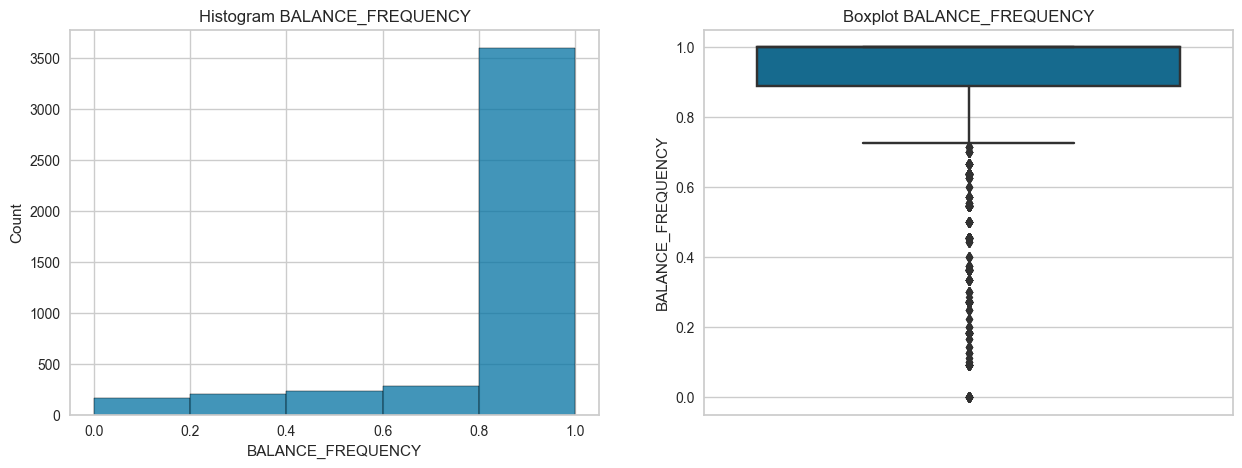

Nilai Skewness BALANCE_FREQUENCY : -2.020309250153954


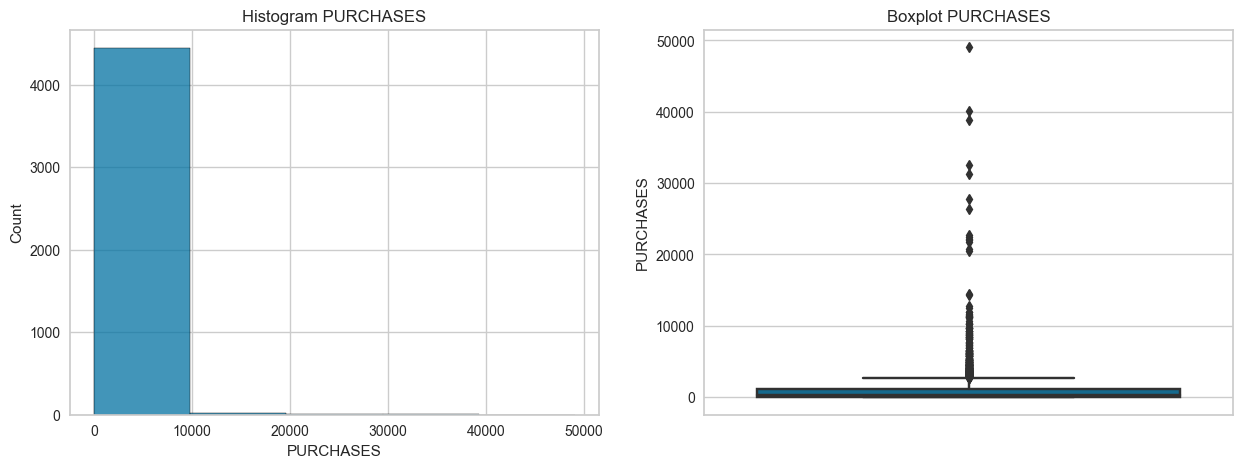

Nilai Skewness PURCHASES : 8.987051591977552


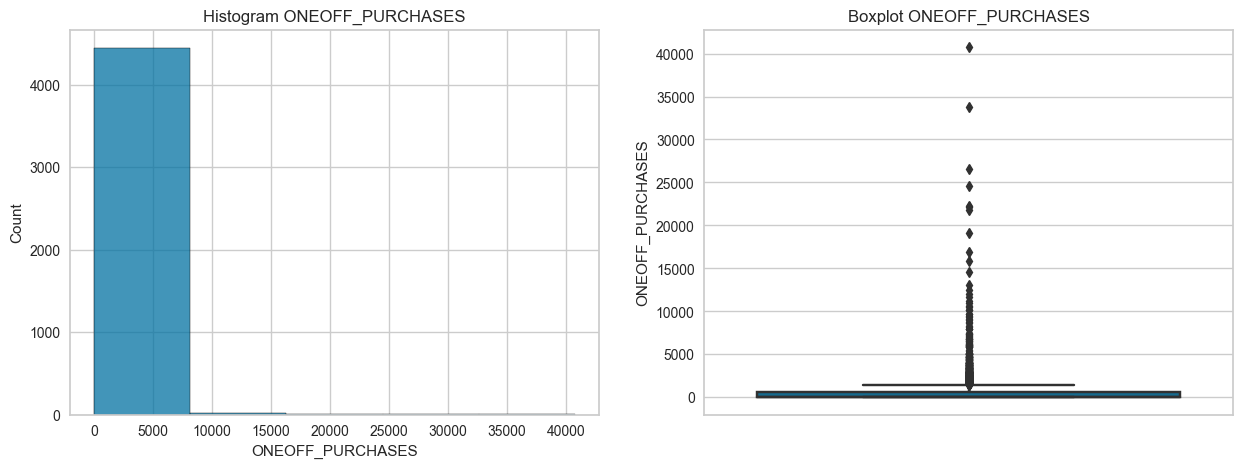

Nilai Skewness ONEOFF_PURCHASES : 10.140058770209015


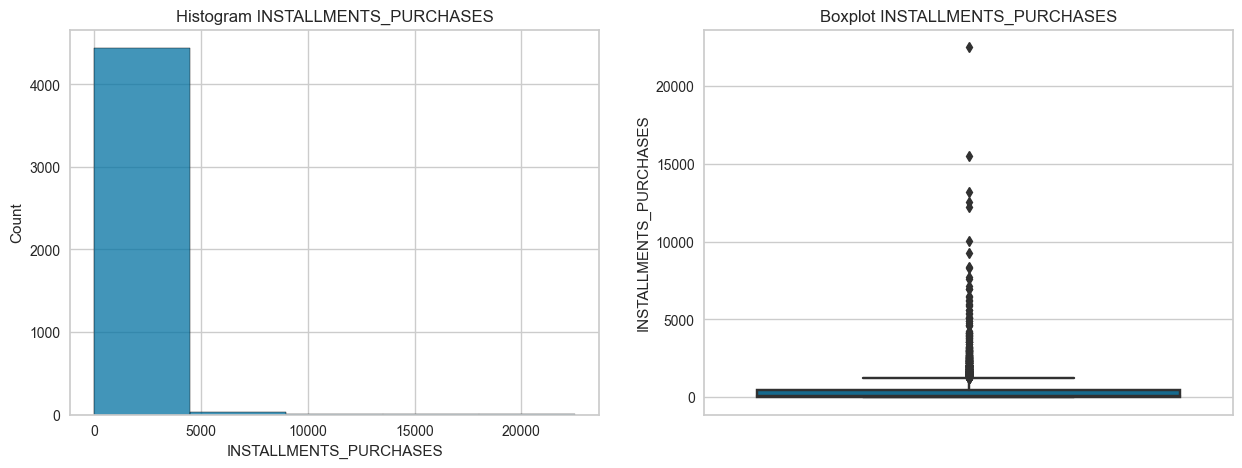

Nilai Skewness INSTALLMENTS_PURCHASES : 8.116887369354234


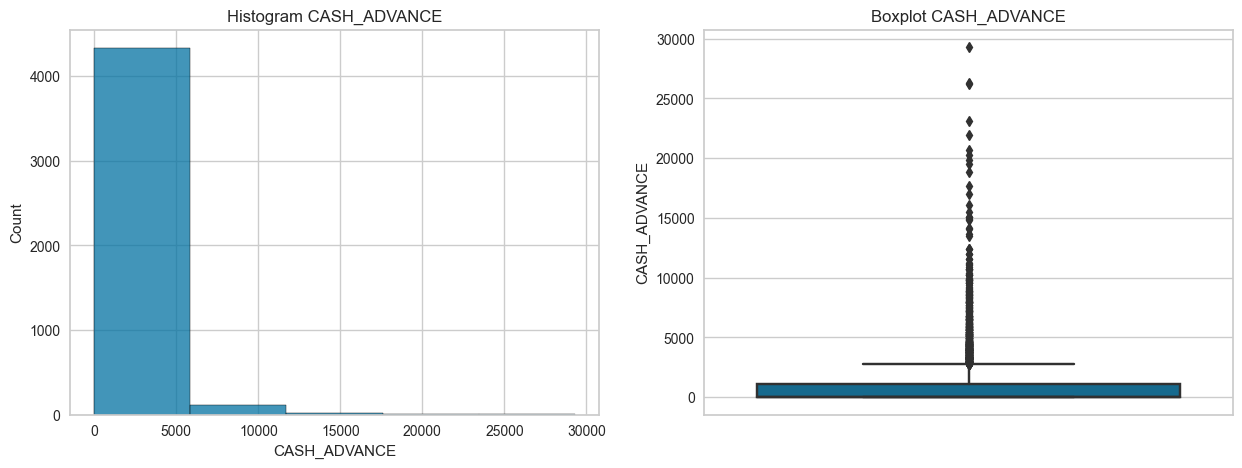

Nilai Skewness CASH_ADVANCE : 4.739677538274201


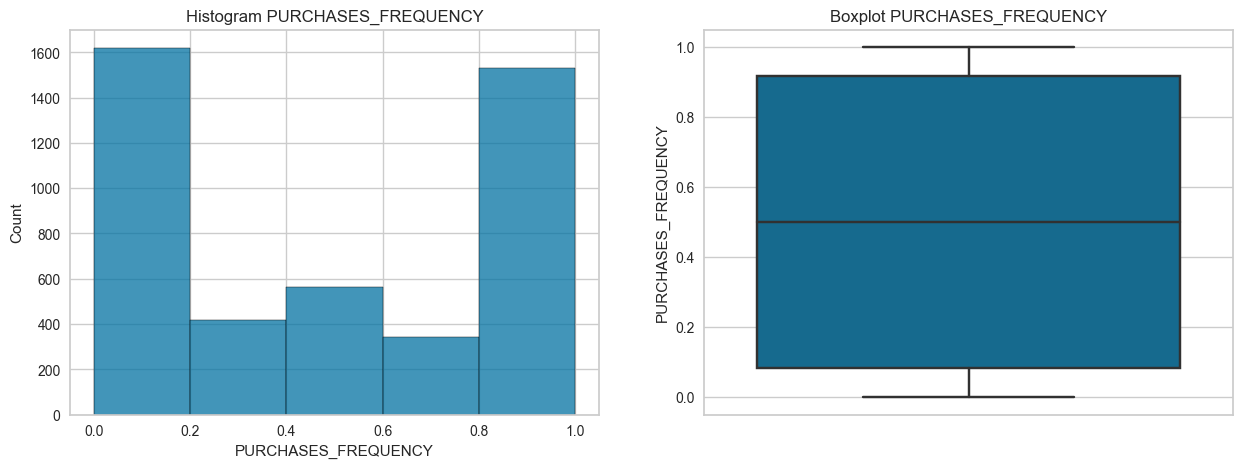

Nilai Skewness PURCHASES_FREQUENCY : 0.06159754482450298


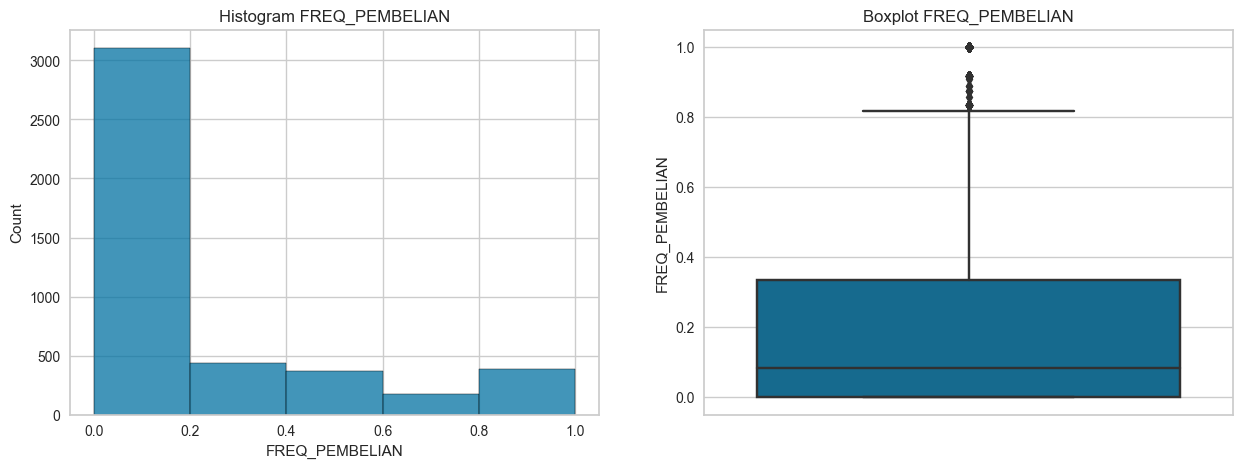

Nilai Skewness FREQ_PEMBELIAN : 1.5234554787719887


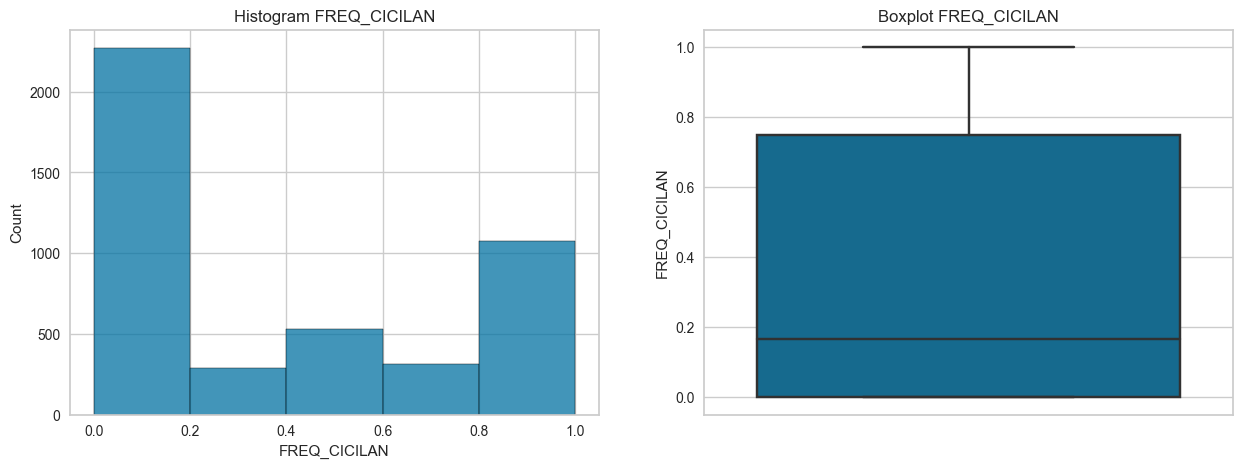

Nilai Skewness FREQ_CICILAN : 0.5102876658863782


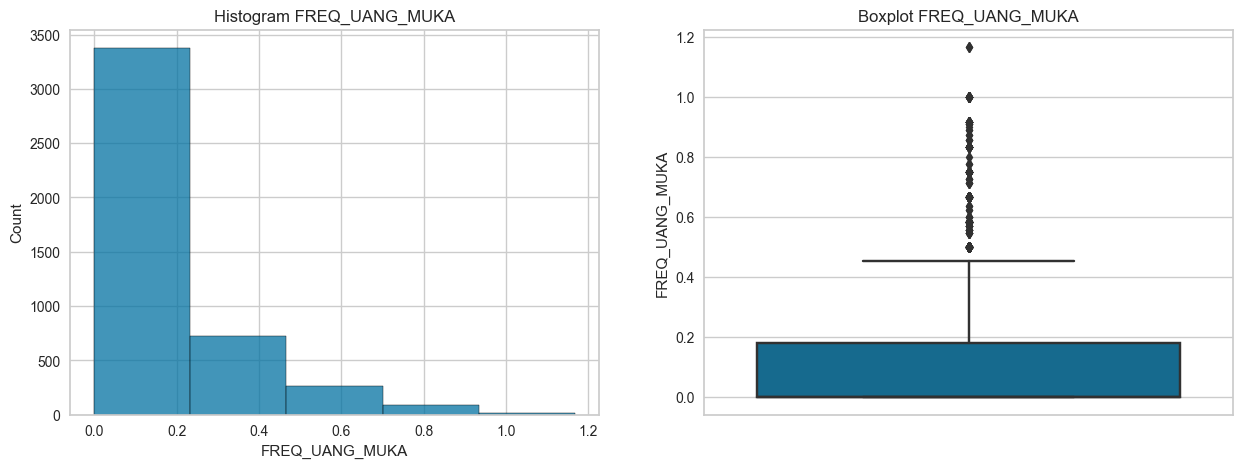

Nilai Skewness FREQ_UANG_MUKA : 1.8233800138256115


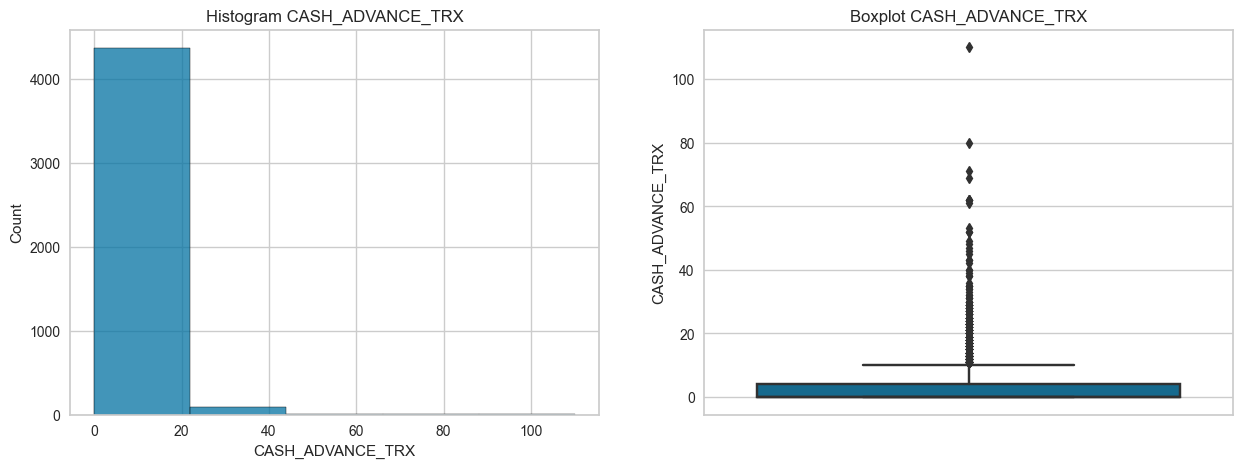

Nilai Skewness CASH_ADVANCE_TRX : 4.752780003316019


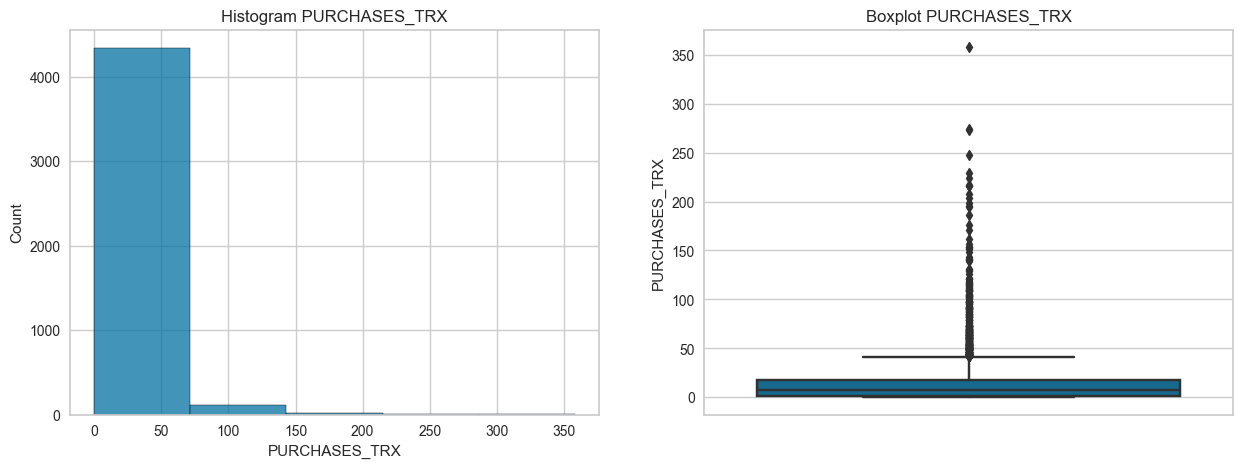

Nilai Skewness PURCHASES_TRX : 4.480452469147952


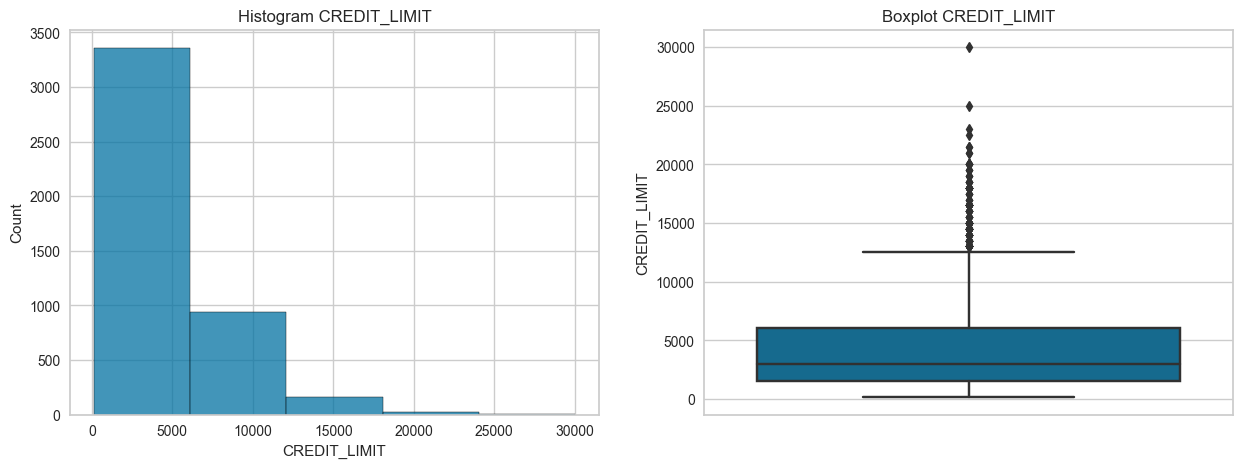

Nilai Skewness CREDIT_LIMIT : 1.5450779677462632


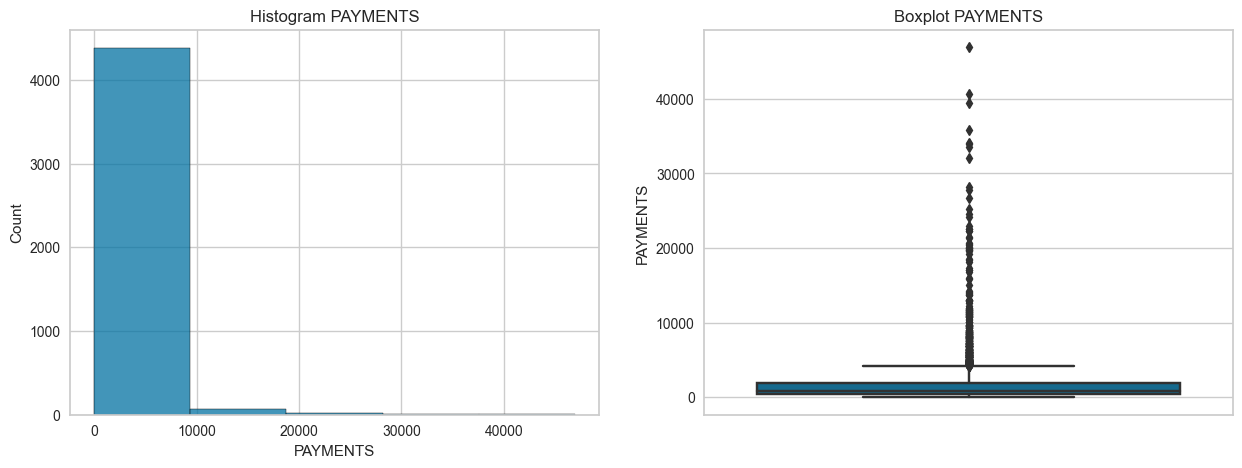

Nilai Skewness PAYMENTS : 6.040773400922328


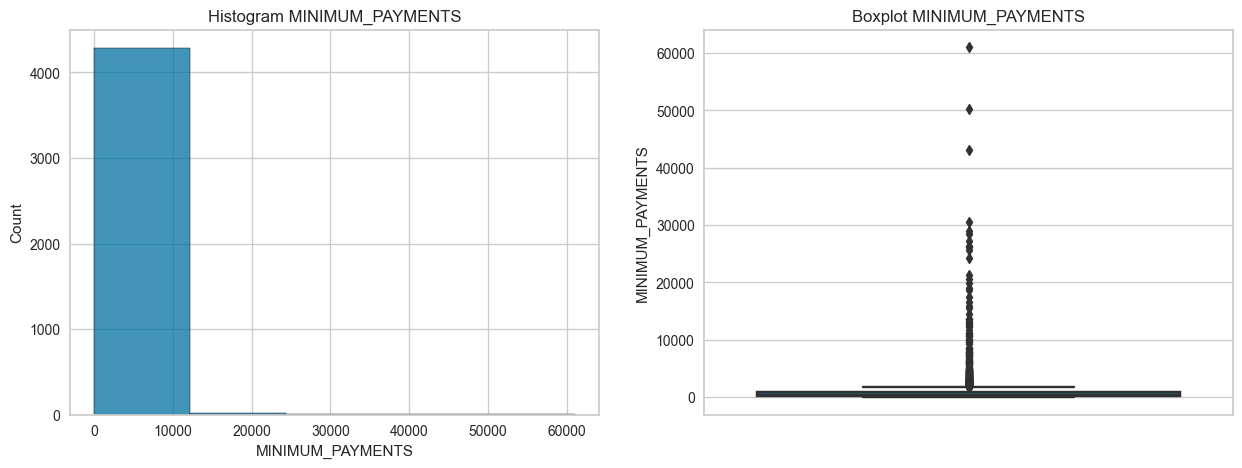

Nilai Skewness MINIMUM_PAYMENTS : 12.357860274482807


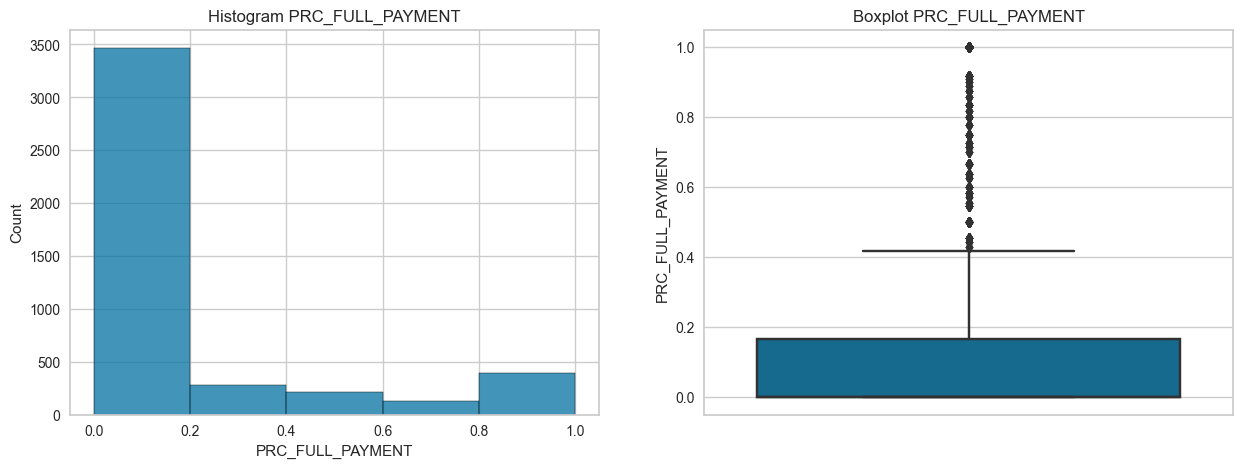

Nilai Skewness PRC_FULL_PAYMENT : 1.9116495684046537


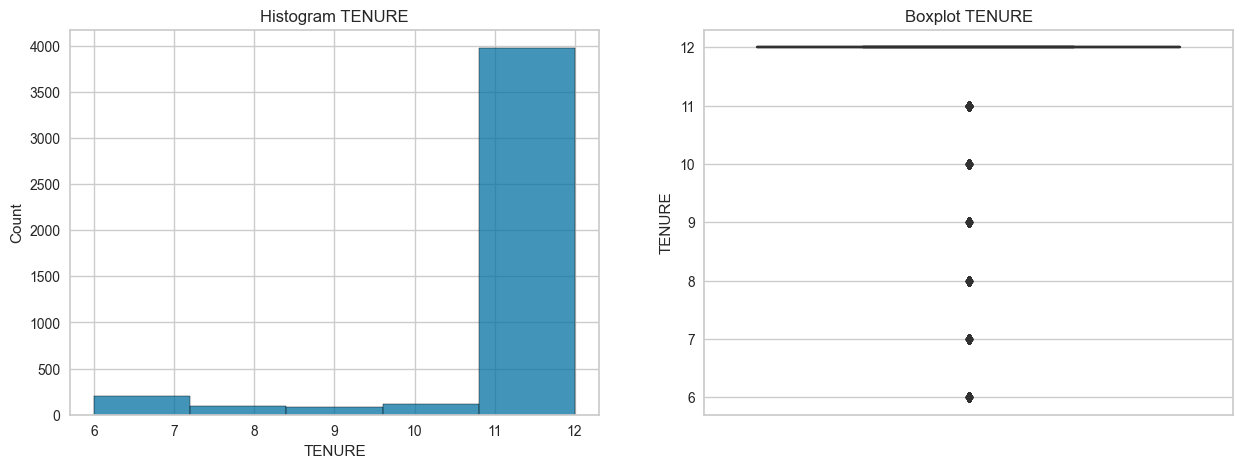

Nilai Skewness TENURE : -2.9328221430257617


In [430]:
# Features label
features = df.columns.values
# looping for plot
for i in features:
    plots(df, i)

- Setelah melakukan visualisasi pada dataset didapatkan insight sebagai berikut:


1. Semua feature berdistribusi `tidak normal` dengan `right-skewness` kecuali feature `PURCHASES_FREQUENCY, FREQ_CICILAN dan CUST_ID`
2. Semua feature yang memiliki outlier akan di handling menggunakan `Capping` dengan `fold 1,5`.


# Data Preprocessing
---

In [431]:
#Drop Colouns
df.drop(['CUST_ID'], axis = 1, inplace= True)

## Model Inference

In [432]:
# create inference data
data_inf = df.sample(20, random_state = 11)
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1226  1526.506915           1.000000      46.67             46.67   
3987   916.749476           1.000000     246.82              0.00   
3809   535.927055           1.000000       0.00              0.00   
2338  2161.715499           0.875000       0.00              0.00   
2785  4785.789559           1.000000       0.00              0.00   
3313   167.356680           1.000000     288.00            288.00   
1207     4.358863           0.181818      70.00             70.00   
3974  4210.323012           1.000000    1210.31            139.02   
920    651.394216           1.000000    2529.64           1014.32   
1172    63.064197           1.000000    1176.93              0.00   
1754    77.325920           1.000000     664.51              0.00   
2988    43.865582           0.818182       0.00              0.00   
4267  2224.891476           1.000000     211.05            211.05   
2801  4613.570499           1.000000       0.00              0.00   
1581    30.186422           0.909091     345.99            120.00   
3552  2285.604784           1.000000      75.00              0.00   
81      14.042720           0.727273      47.79             47.79   
1065   164.649775           1.000000    1764.86           1149.34   
3703  6822.877573           1.000000     137.34            137.34   
862    458.958269           0.363636     492.72              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1226                    0.00      0.000000             0.083333   
3987                  246.82    925.950908             1.000000   
3809                    0.00    562.957567             0.000000   
2338                    0.00   2651.876149             0.000000   
2785                    0.00   8422.554694             0.000000   
3313                    0.00    189.705758             0.083333   
1207                    0.00      0.000000             0.090909   
3974                 1071.29   1817.321515             1.000000   
920                  1515.32      0.000000             1.000000   
1172                 1176.93      0.000000             1.000000   
1754                  664.51      0.000000             0.916667   
2988                    0.00    551.777371             0.000000   
4267                    0.00   4014.663620             0.333333   
2801                    0.00   1728.341939             0.000000   
1581                  225.99      0.000000             0.666667   
3552                   75.00   2539.047806             0.250000   
81                      0.00      0.000000             0.250000   
1065                  615.52      0.000000             1.000000   
3703                    0.00   4815.112874             0.083333   
862                   492.72      0.000000             1.000000   

      FREQ_PEMBELIAN  FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  \
1226        0.083333      0.000000        0.000000                 0   
3987        0.000000      0.916667        0.166667                 8   
3809        0.000000      0.000000        0.166667                 2   
2338        0.000000      0.000000        0.125000                 4   
2785        0.000000      0.000000        0.875000                25   
3313        0.083333      0.000000        0.083333                 1   
1207        0.090909      0.000000        0.000000                 0   
3974        1.000000      1.000000        0.166667                 2   
920         0.916667      1.000000        0.000000                 0   
1172        0.000000      1.000000        0.000000                 0   
1754        0.000000      0.833333        0.000000                 0   
2988        0.000000      0.000000        0.083333                 1   
4267        0.333333      0.000000        0.833333                19   
2801        0.000000      0.000000        0.090909                 1   
1581        0.250000      0.583333        0.000000                 0   


In [433]:
# Create train_test
data_model = df.drop(data_inf.index)
data_model

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      FREQ_PEMBELIAN  FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  \
0           0.000000      0.125000        0.000000                 0   
1           0.125000      0.000000        0.000000                 0   
2           0.125000      0.000000        0.000000                 0   
3           0.125000      0.000000        0.000000                 0   
4           0.125000      0.000000        0.000000                 0   
...              ...           ...             ...               ...   
4470        0.000000      0.000000        0.545455                 9   
4471        0.000000      0.000000        0.545455                 7   
4472        0.727273      0.363636        0.545455                 9   
4473        0.454545      0.000000        0.545455                17   
4474        0.090909      0.818182        0.545455                21   

      PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                 2        1200.0     0.000000               NaN   
1                 1        1000.0   215.325023        410.484825   
2                 1        1500.0     0.000000               NaN   
3                 1        1000.0   258.032630        151.696433   
4                 1        1500.0   397.090516        227.143184   
...             ...           ...          ...               ...   
4470              0        1200.0  1379.635287        271.364415   
4471              0        4150.0  4372.148648        241.645387   
4472             20       10100.0  1039.000037        886.050237   
4473             25        6000.0   905.844846       2376.919568   
4474             17        4000.0  3056.424974        910.707525   

      PRC_FULL_PAYMENT  TENURE  
0             0.000000       8  
1             0.000000       8  
2             0.000000       8  
3             0.000000       8  
4             0.000000       8  
...                ...     ...  
4470          0.090909      11  
4471          0.090909      11  
4472          0.000000      11  
4473          0.090909      11  
4474          0.090909      11  

[4455 rows x 17 columns]

In [434]:
#Reset index
data_model.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop =True, inplace=True)
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   1526.506915           1.000000      46.67             46.67   
1    916.749476           1.000000     246.82              0.00   
2    535.927055           1.000000       0.00              0.00   
3   2161.715499           0.875000       0.00              0.00   
4   4785.789559           1.000000       0.00              0.00   
5    167.356680           1.000000     288.00            288.00   
6      4.358863           0.181818      70.00             70.00   
7   4210.323012           1.000000    1210.31            139.02   
8    651.394216           1.000000    2529.64           1014.32   
9     63.064197           1.000000    1176.93              0.00   
10    77.325920           1.000000     664.51              0.00   
11    43.865582           0.818182       0.00              0.00   
12  2224.891476           1.000000     211.05            211.05   
13  4613.570499           1.000000       0.00              0.00   
14    30.186422           0.909091     345.99            120.00   
15  2285.604784           1.000000      75.00              0.00   
16    14.042720           0.727273      47.79             47.79   
17   164.649775           1.000000    1764.86           1149.34   
18  6822.877573           1.000000     137.34            137.34   
19   458.958269           0.363636     492.72              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  FREQ_PEMBELIAN  \
0                     0.00      0.000000             0.083333        0.083333   
1                   246.82    925.950908             1.000000        0.000000   
2                     0.00    562.957567             0.000000        0.000000   
3                     0.00   2651.876149             0.000000        0.000000   
4                     0.00   8422.554694             0.000000        0.000000   
5                     0.00    189.705758             0.083333        0.083333   
6                     0.00      0.000000             0.090909        0.090909   
7                  1071.29   1817.321515             1.000000        1.000000   
8                  1515.32      0.000000             1.000000        0.916667   
9                  1176.93      0.000000             1.000000        0.000000   
10                  664.51      0.000000             0.916667        0.000000   
11                    0.00    551.777371             0.000000        0.000000   
12                    0.00   4014.663620             0.333333        0.333333   
13                    0.00   1728.341939             0.000000        0.000000   
14                  225.99      0.000000             0.666667        0.250000   
15                   75.00   2539.047806             0.250000        0.000000   
16                    0.00      0.000000             0.250000        0.083333   
17                  615.52      0.000000             1.000000        0.666667   
18                    0.00   4815.112874             0.083333        0.083333   
19                  492.72      0.000000             1.000000        0.000000   

    FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  PURCHASES_TRX  \
0       0.000000        0.000000                 0              1   
1       0.916667        0.166667                 8             19   
2       0.000000        0.166667                 2              0   
3       0.000000        0.125000                 4              0   
4       0.000000        0.875000                25              0   
5       0.000000        0.083333                 1              3   
6       0.000000        0.000000                 0              1   
7       1.000000        0.166667                 2             52   
8       1.000000        0.000000                 0             83   
9       1.000000        0.000000                 0             23   
10      0.833333        0.000000                 0             11   
11      0.000000        0.083333                 1              0   
1

- Pada tahap ini sudah dipisahkan antara data train test yang digunakan untuk membuat model mechine learning dengan data inference sebanyak `20` baris data.

## Check Missing Value

In [435]:
# Check MisNa
data_model.isna().mean()

BALANCE                   0.000000
BALANCE_FREQUENCY         0.000000
PURCHASES                 0.000000
ONEOFF_PURCHASES          0.000000
INSTALLMENTS_PURCHASES    0.000000
CASH_ADVANCE              0.000000
PURCHASES_FREQUENCY       0.000000
FREQ_PEMBELIAN            0.000000
FREQ_CICILAN              0.000000
FREQ_UANG_MUKA            0.000000
CASH_ADVANCE_TRX          0.000000
PURCHASES_TRX             0.000000
CREDIT_LIMIT              0.000224
PAYMENTS                  0.000000
MINIMUM_PAYMENTS          0.035466
PRC_FULL_PAYMENT          0.000000
TENURE                    0.000000
dtype: float64

- Terdapat missing value di 2 feature. `0.000224` rata-rata Missing value pada `CREDIT_LIMIT` dan `0.035` rata rata missing value pada `MINIMUM_PAYMENT`. Sehingga akan dilakukan missing value imputation dengan nilai median. Dikarena distribusi dari data credit_limit dan minimum payment adalah `distribusi tidak normal` dengan `Right-skewness` dan nilai missing value dibawah 5%.

In [436]:
# median imputation in Minimum Payment
data_model['MINIMUM_PAYMENTS'].fillna(data_model['MINIMUM_PAYMENTS'].median(), inplace = True) 
data_model['CREDIT_LIMIT'].fillna(data_model['CREDIT_LIMIT'].median(), inplace = True) 

In [437]:
# check missing value
data_model.isna().sum()

BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
FREQ_PEMBELIAN            0
FREQ_CICILAN              0
FREQ_UANG_MUKA            0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

- Sudah tidak terdapat missing value pada dataset


## Handling Outlier 

### Detection Outlier


In [438]:
# Variabel columns outlier
col= ['BALANCE', 'BALANCE_FREQUENCY','PURCHASES',
 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE','FREQ_PEMBELIAN','FREQ_UANG_MUKA','CASH_ADVANCE_TRX',
 'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS',
 'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

### Capping

In [439]:
# handling outlier with capping method
capping = Winsorizer(capping_method = 'iqr', tail = 'both', fold= 1.5, variables= col)
data_model = capping.fit_transform(data_model)
data_model

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.722223     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.722223      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4450  1079.008102           1.000000       0.00              0.00   
4451   809.582978           0.909091       0.00              0.00   
4452  3386.490883           1.000000     560.98            427.22   
4453  4840.545574           1.000000    1595.93           1460.00   
4454  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4450                    0.00   1259.571764             0.000000   
4451                    0.00   2740.747058             0.000000   
4452                  133.76   2008.153534             1.000000   
4453                    0.00   2740.747058             0.454545   
4454                  805.14   2740.747058             0.909091   

      FREQ_PEMBELIAN  FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  \
0           0.000000      0.125000        0.000000                 0   
1           0.125000      0.000000        0.000000                 0   
2           0.125000      0.000000        0.000000                 0   
3           0.125000      0.000000        0.000000                 0   
4           0.125000      0.000000        0.000000                 0   
...              ...           ...             ...               ...   
4450        0.000000      0.000000        0.454545                 9   
4451        0.000000      0.000000        0.454545                 7   
4452        0.727273      0.363636        0.454545                 9   
4453        0.454545      0.000000        0.454545                10   
4454        0.090909      0.818182        0.454545                10   

      PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                 2        1200.0     0.000000        310.111406   
1                 1        1000.0   215.325023        410.484825   
2                 1        1500.0     0.000000        310.111406   
3                 1        1000.0   258.032630        151.696433   
4                 1        1500.0   397.090516        227.143184   
...             ...           ...          ...               ...   
4450              0        1200.0  1379.635287        271.364415   
4451              0        4150.0  4157.645865        241.645387   
4452             20       10100.0  1039.000037        886.050237   
4453             25        6000.0   905.844846       1721.947132   
4454             17        4000.0  3056.424974        910.707525   

      PRC_FULL_PAYMENT  TENURE  
0             0.000000       8  
1             0.000000       8  
2             0.000000       8  
3             0.000000       8  
4             0.000000       8  
...                ...     ...  
4450          0.090909      11  
4451          0.090909      11  
4452          0.000000      11  
4453          0.090909      11  
4454          0.090909      11  

[4455 rows x 17 columns]

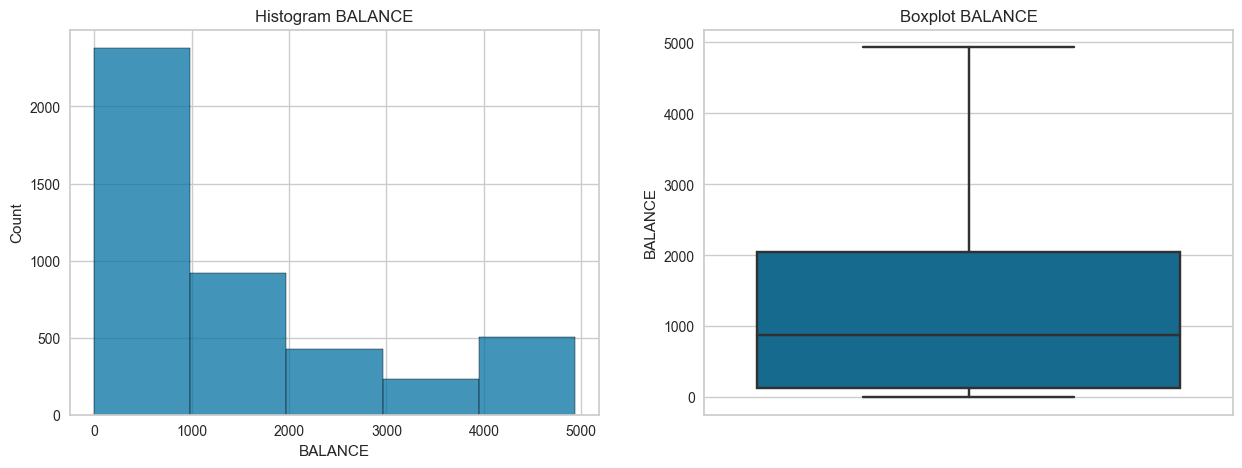

Nilai Skewness BALANCE : 1.1629594909224166


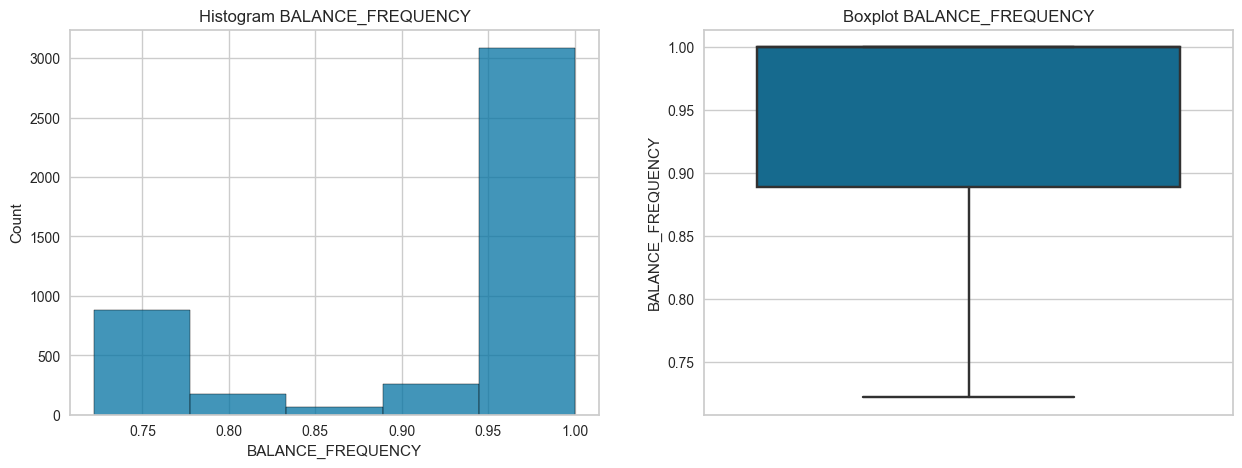

Nilai Skewness BALANCE_FREQUENCY : -1.1667680711985815


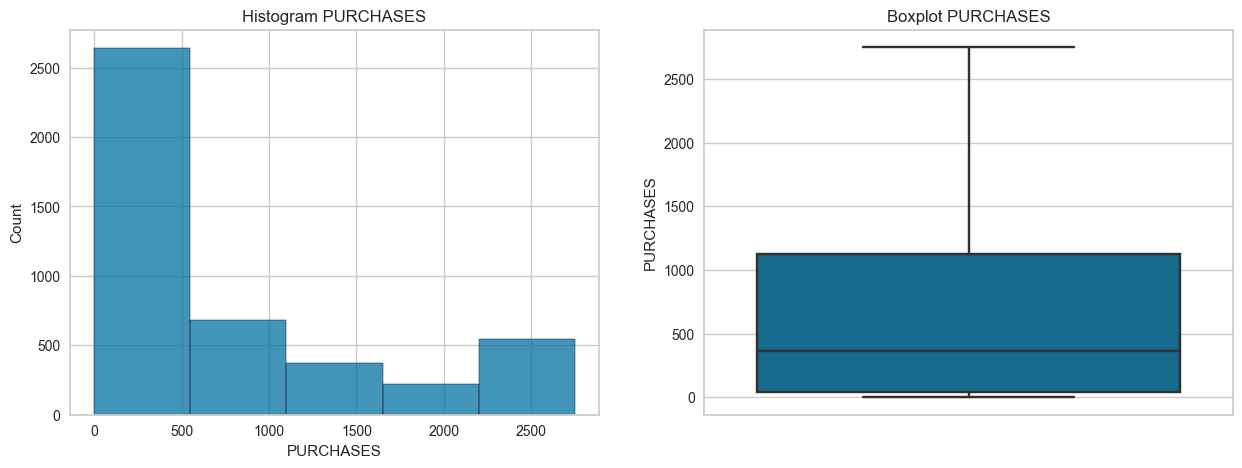

Nilai Skewness PURCHASES : 1.2060133571434442


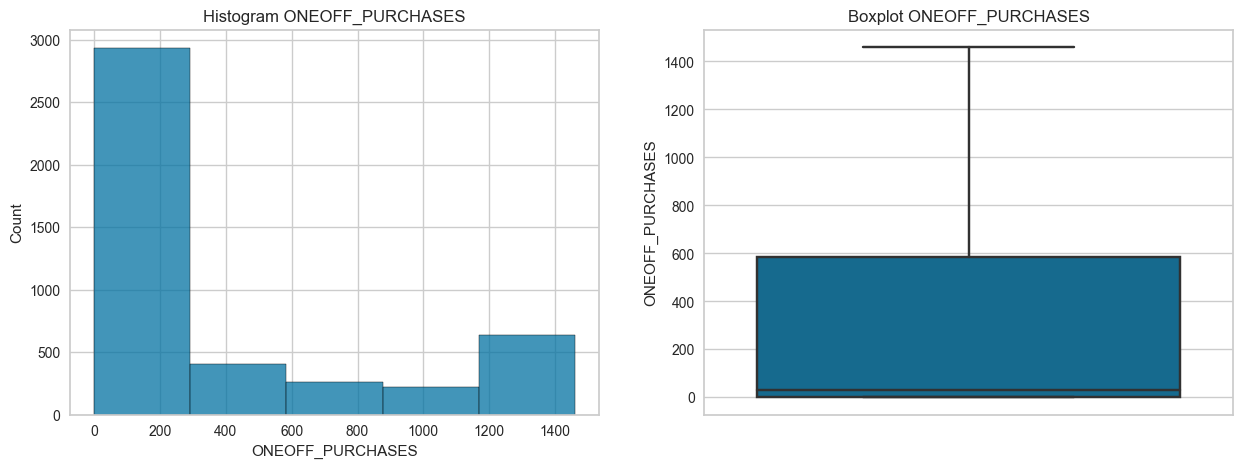

Nilai Skewness ONEOFF_PURCHASES : 1.229975872844746


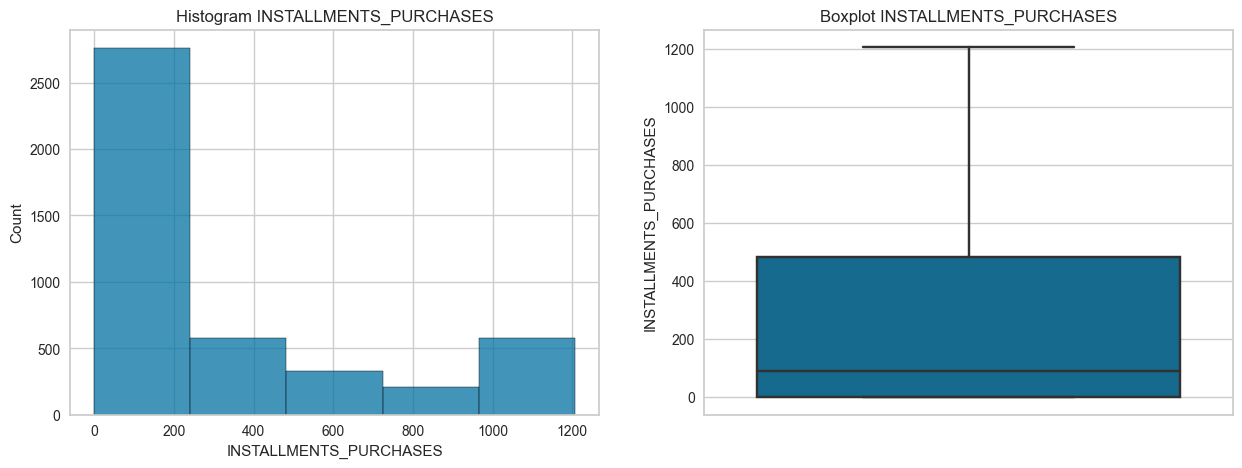

Nilai Skewness INSTALLMENTS_PURCHASES : 1.2244983502628743


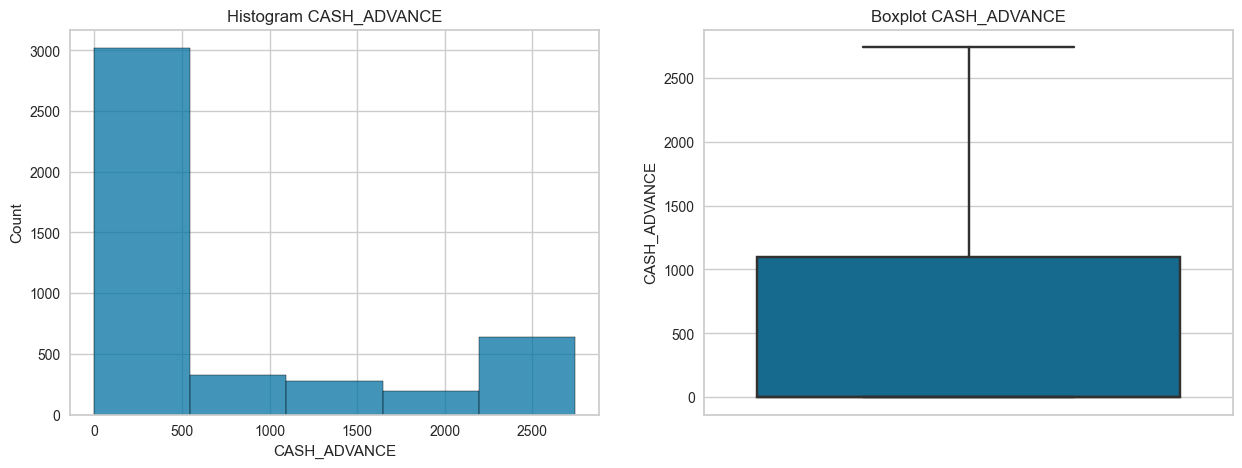

Nilai Skewness CASH_ADVANCE : 1.2659502826573261


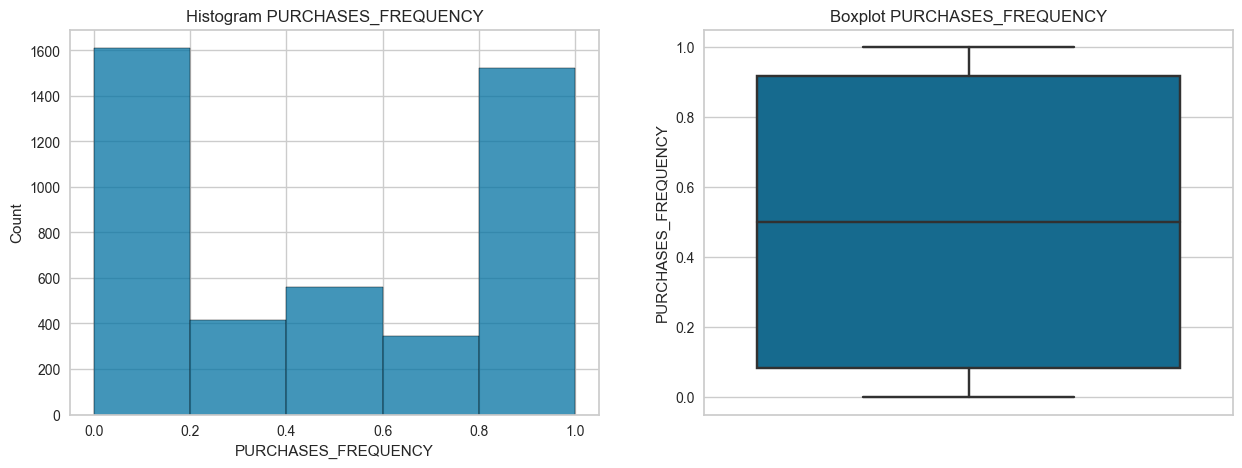

Nilai Skewness PURCHASES_FREQUENCY : 0.060213655884487946


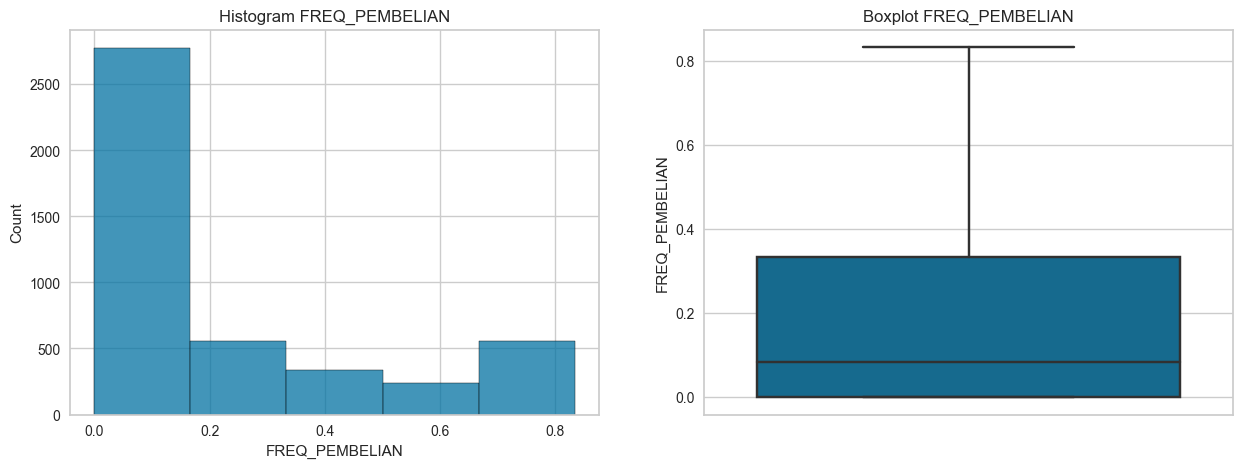

Nilai Skewness FREQ_PEMBELIAN : 1.339861026260692


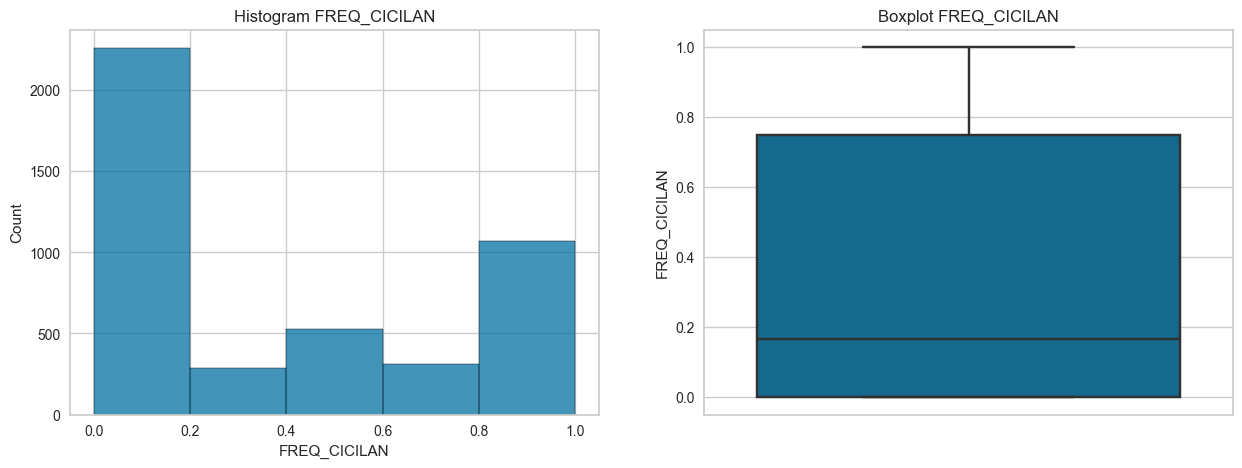

Nilai Skewness FREQ_CICILAN : 0.5104461482053914


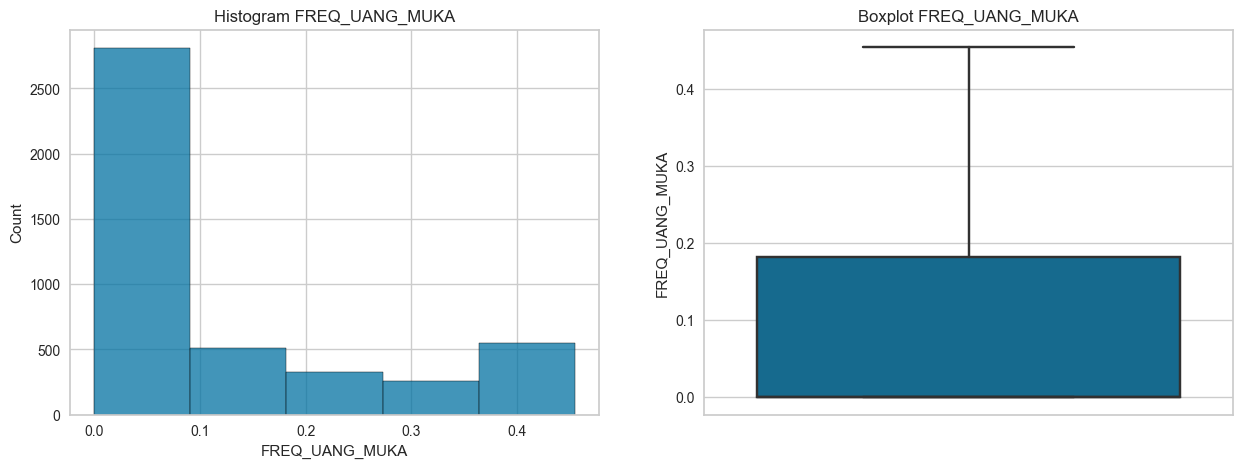

Nilai Skewness FREQ_UANG_MUKA : 1.0773157880681608


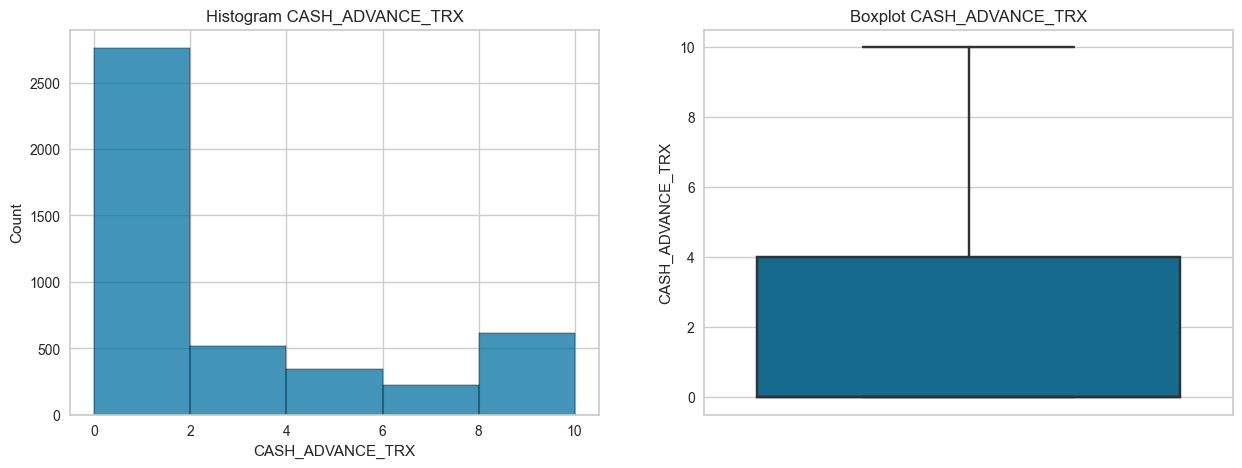

Nilai Skewness CASH_ADVANCE_TRX : 1.2883794909917812


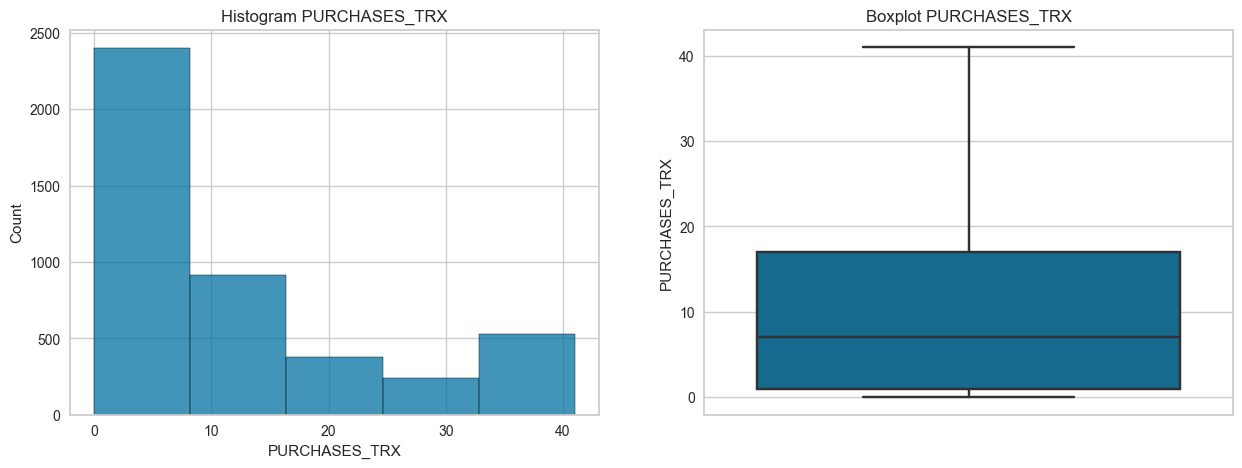

Nilai Skewness PURCHASES_TRX : 1.1448974847338547


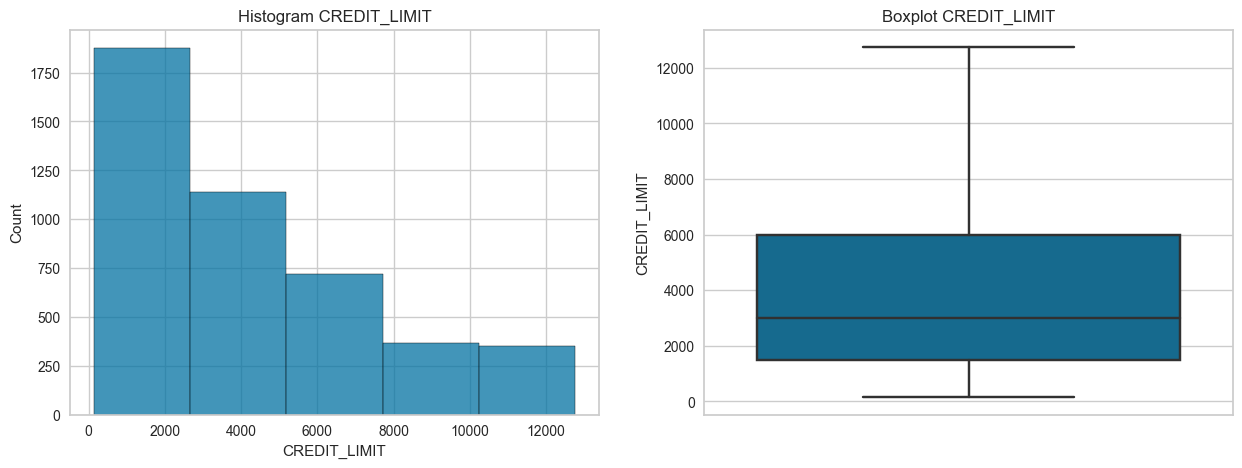

Nilai Skewness CREDIT_LIMIT : 1.0107769668448996


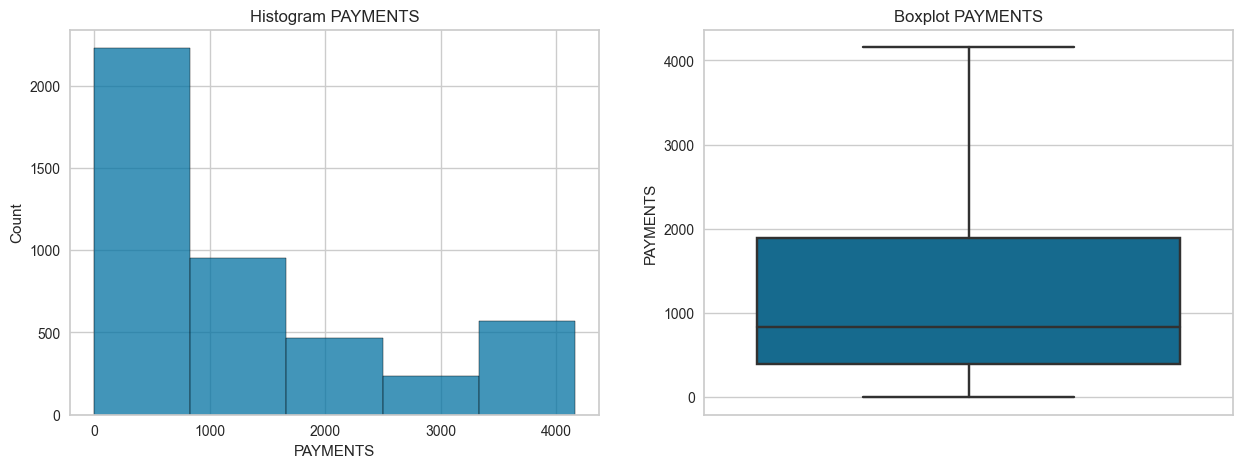

Nilai Skewness PAYMENTS : 1.1420050362973573


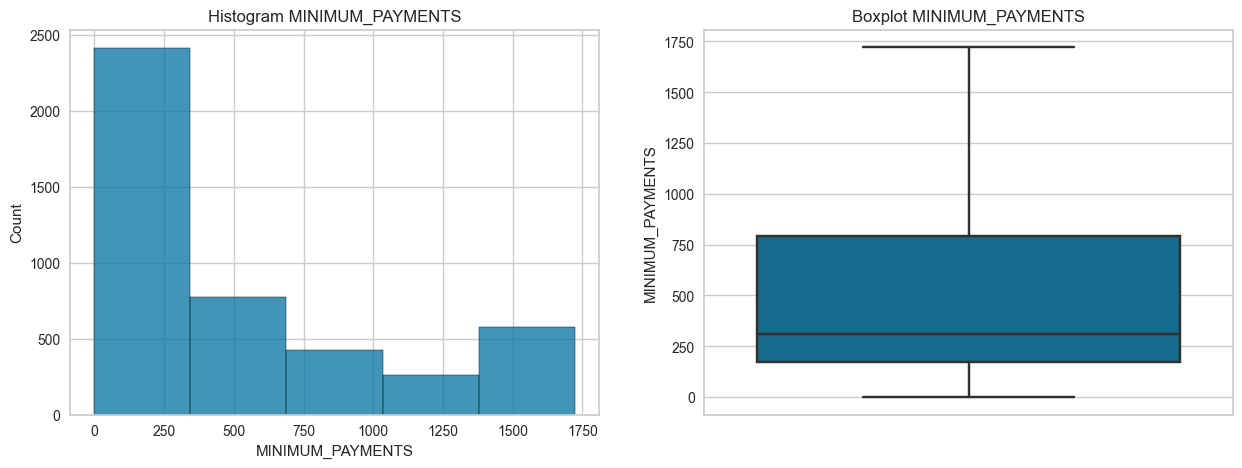

Nilai Skewness MINIMUM_PAYMENTS : 1.1811803587953995


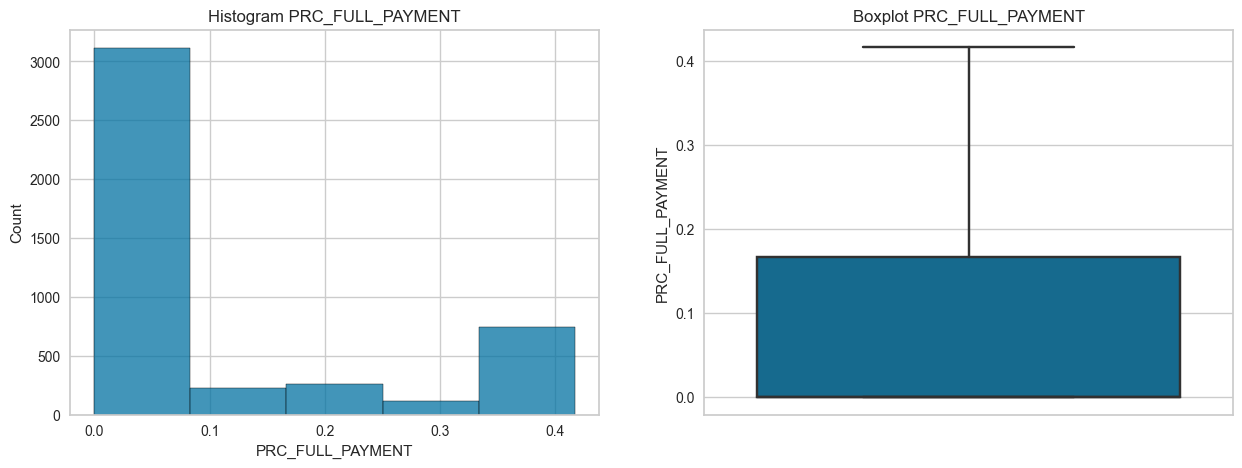

Nilai Skewness PRC_FULL_PAYMENT : 1.2704289938179065


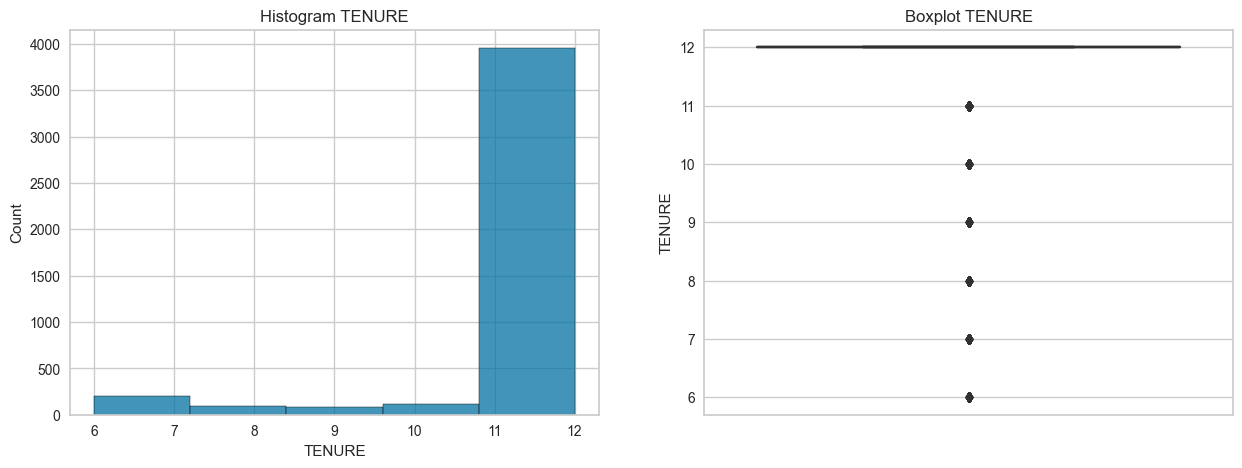

Nilai Skewness TENURE : -2.934338045213221


In [440]:
# Features label
features = data_model.columns.values
# looping for plot
for i in features:
    plots(data_model, i)

- Sekarang seluruh data sudah berada pada sebaran datanya dan tidak ada outlier

## Handling Missing Value

In [441]:
# missing value in x_train
data_model.isna().sum()

BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
FREQ_PEMBELIAN            0
FREQ_CICILAN              0
FREQ_UANG_MUKA            0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

## Feature Scaling

In [442]:
# find numerical columns
num_colum = data_model.select_dtypes(include = np.number).columns.tolist()
num_colum

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'FREQ_PEMBELIAN',
 'FREQ_CICILAN',
 'FREQ_UANG_MUKA',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [443]:
#Feature scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_model)

data_scaled = scaler.transform(data_model)

data_model_final = pd.DataFrame(data_scaled, columns=data_model.columns)
data_model_final

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.003361           0.000000   0.072763          0.000000   
1     0.191283           0.550000   0.037473          0.070548   
2     0.000401           0.000000   0.029105          0.054795   
3     0.093546           1.000000   0.212832          0.400685   
4     0.213585           1.000000   0.527531          0.993151   
...        ...                ...        ...               ...   
4450  0.218736           1.000000   0.000000          0.000000   
4451  0.164119           0.672727   0.000000          0.000000   
4452  0.686509           1.000000   0.204093          0.292616   
4453  0.981275           1.000000   0.580623          1.000000   
4454  0.400779           1.000000   0.375471          0.155411   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.165848      0.000000             0.125000   
1                   0.000000      0.000000             0.125000   
2                   0.000000      0.000000             0.125000   
3                   0.000000      0.000000             0.125000   
4                   0.000000      0.000000             0.125000   
...                      ...           ...                  ...   
4450                0.000000      0.459572             0.000000   
4451                0.000000      1.000000             0.000000   
4452                0.110919      0.732703             1.000000   
4453                0.000000      1.000000             0.454545   
4454                0.667653      1.000000             0.909091   

      FREQ_PEMBELIAN  FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  \
0           0.000000      0.125000             0.0               0.0   
1           0.150000      0.000000             0.0               0.0   
2           0.150000      0.000000             0.0               0.0   
3           0.150000      0.000000             0.0               0.0   
4           0.150000      0.000000             0.0               0.0   
...              ...           ...             ...               ...   
4450        0.000000      0.000000             1.0               0.9   
4451        0.000000      0.000000             1.0               0.7   
4452        0.872728      0.363636             1.0               0.9   
4453        0.545455      0.000000             1.0               1.0   
4454        0.109091      0.818182             1.0               1.0   

      PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0          0.048780      0.083333  0.000000          0.180075   
1          0.024390      0.067460  0.051790          0.238367   
2          0.024390      0.107143  0.000000          0.180075   
3          0.024390      0.067460  0.062062          0.088076   
4          0.024390      0.107143  0.095508          0.131892   
...             ...           ...       ...               ...   
4450       0.000000      0.083333  0.331831          0.157573   
4451       0.000000      0.317460  1.000000          0.140314   
4452       0.487805      0.789683  0.249901          0.514552   
4453       0.609756      0.464286  0.217874          1.000000   
4454       0.414634      0.305556  0.735134          0.528872   

      PRC_FULL_PAYMENT    TENURE  
0             0.000000  0.333333  
1             0.000000  0.333333  
2             0.000000  0.333333  
3             0.000000  0.333333  
4             0.000000  0.333333  
...                ...       ...  
4450          0.218181  0.833333  
4451          0.218181  0.833333  
4452          0.000000  0.833333  
4453          0.218181  0.833333  
4454          0.218181  0.833333  

[4455 rows x 17 columns]

- Proses scaling digunakan agar setiap value yang berada pada feature memiliki `rentang yang sama` yaitu dari `0-1`. Dan sekarang sudah tidak ada value pada dataset yang memiliki nilai diluar rentang

## Check VIF

In [444]:
# Checking with VIF
vif_data = pd.DataFrame()
vif_data['features'] = data_model_final.columns

vif_data['VIF'] = [variance_inflation_factor(data_model_final.values, i) for i in range(len(data_model_final.columns))]

vif_data

features        VIF
0                  BALANCE  10.057398
1        BALANCE_FREQUENCY   6.678123
2                PURCHASES  27.545640
3         ONEOFF_PURCHASES  15.705044
4   INSTALLMENTS_PURCHASES  11.471467
5             CASH_ADVANCE   5.080264
6      PURCHASES_FREQUENCY  26.087000
7           FREQ_PEMBELIAN  10.025098
8             FREQ_CICILAN  22.363414
9           FREQ_UANG_MUKA  12.021652
10        CASH_ADVANCE_TRX  12.408545
11           PURCHASES_TRX  11.213920
12            CREDIT_LIMIT   4.870946
13                PAYMENTS   4.384938
14        MINIMUM_PAYMENTS   7.481388
15        PRC_FULL_PAYMENT   2.120010
16                  TENURE   7.285896

- Berdasarkan Nilai `VIF` didapatkan feature dengan nilai dibawah 5 berjumlah `3 feature` yaitu `CREDIT_LIMIT, PAYMENTS, PRC_FULL_PAYMENT` yang memiliki artian feature tersebut tidak multicolinearity atau tidak memiliki korelasi yang tinggi. Sehingga data paling bagus di reduksi menjadi `14 dimensi` berdasarkan nilai VIF.


## PCA


In [445]:
# PCA method

pca = PCA()

pca.fit(data_model_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

10

####  EVR PCA


In [446]:
pca = PCA (n_components=6)
pca_model = pca.fit_transform(data_model_final)
model_pca = pd.DataFrame(pca_model)
model_pca

0         1         2         3         4         5
0    -0.541309 -0.938520  0.151892 -0.002079  0.388125  0.483035
1    -0.572825 -0.644055  0.146496 -0.356342  0.076337  0.205366
2    -0.612029 -0.927413  0.331681 -0.084750  0.309587  0.476163
3    -0.377731 -0.491089  0.225814 -0.572801 -0.276773  0.113983
4    -0.122367 -0.250185  0.582946 -0.671708 -0.239954  0.175419
...        ...       ...       ...       ...       ...       ...
4450 -1.085774  0.314024 -0.084426  0.282122 -0.616887  0.063116
4451 -1.093602  0.523973  0.204025  0.740577 -0.229965 -0.021696
4452 -0.054900  1.219004  0.003761  0.134503 -0.383182  0.439821
4453 -0.302984  1.636448  0.512902  0.078618 -0.260695  0.248094
4454  0.064882  1.154590 -0.594778  0.821820 -0.250103  0.315670

[4455 rows x 6 columns]

In [447]:
# components
pca.n_components_

6

In [448]:
# EVR
np.sum(pca.explained_variance_ratio_)

0.861017045498139

- Dengan mereduksi data menjadi `6 feature` data ini masih membawa informasi sebesar `94%` dari data.

## PCA

In [449]:
# pca with komponen
pca_ = PCA(n_components=6)
pca_.fit(data_model_final)

train = pca_.transform(data_model_final)

data_model_final = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1,7)])
data_model_final

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6
0    -0.541309 -0.938520  0.151892 -0.002079  0.388125  0.483035
1    -0.572825 -0.644055  0.146496 -0.356342  0.076337  0.205366
2    -0.612029 -0.927413  0.331681 -0.084750  0.309587  0.476162
3    -0.377731 -0.491089  0.225814 -0.572801 -0.276773  0.113983
4    -0.122367 -0.250185  0.582946 -0.671708 -0.239955  0.175420
...        ...       ...       ...       ...       ...       ...
4450 -1.085774  0.314024 -0.084426  0.282122 -0.616887  0.063116
4451 -1.093602  0.523973  0.204025  0.740577 -0.229965 -0.021695
4452 -0.054900  1.219004  0.003761  0.134503 -0.383182  0.439821
4453 -0.302984  1.636448  0.512902  0.078618 -0.260696  0.248095
4454  0.064882  1.154590 -0.594778  0.821820 -0.250104  0.315671

[4455 rows x 6 columns]

# Clustering



---


## K-Means


In [450]:
# FInd K optimal
k=[2,3,4,5,6]
kmeans_k = [KMeans(n_clusters = i, random_state = 17).fit(data_model_final)
            for i in range (1,7)]

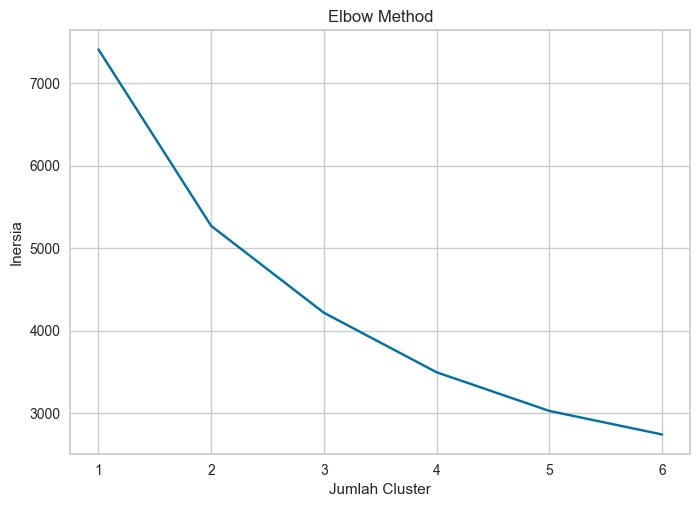

In [451]:
# buat looping untuk menghitung inersia dari masing-masing banyanya kluster
cs = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, random_state = 17)
    kmeans.fit(data_model_final)
    cs.append(kmeans.inertia_)
plt.plot(range(1,7), cs)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()


- Pada elbow method dilihat sekilas bahwa cluster yang paling baik adalah `2 cluster`.

In [452]:
# check silhouette score
silhouette_score(data_model_final, kmeans.labels_)

0.2758993668091683

In [453]:
# creat looping untuk kmeans
kmeans_per_k = [KMeans(n_clusters=i, random_state=17).fit(data_model_final)
                for i in range(1, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

# silhouette scores
silhouette_scores = [silhouette_score(data_model_final, model.labels_)
                     for model in kmeans_per_k[1:]]



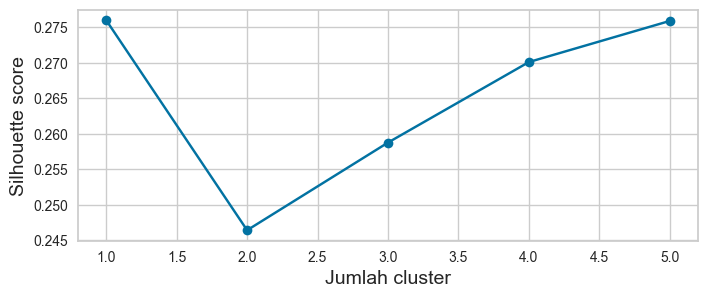

In [454]:
# plot untuk silhouette_scores dengan jumlah 
plt.figure(figsize=(8, 3))
plt.plot(range(1, 6), silhouette_scores, "bo-")
plt.xlabel("Jumlah cluster", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()



- Menggunakan `silhouette score` ditemukan cluster terbaik adalah `5 cluster`.

Elbow Method


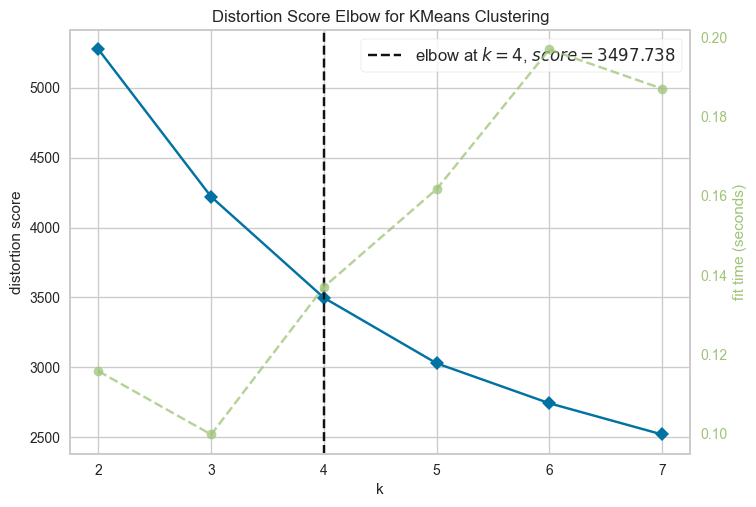

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [455]:
# Display Elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(data_model_final)
Elbow_M.show()

- Berdasarkan hasil visualisasi didapatkan nilai K paling optimal adalah `4`

## Agglomerative

In [456]:
# looping agglo with K
k=[2,3,4,5,6]
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(data_model_final)
                for k in range(1, 7)]
agglo_per_k

[AgglomerativeClustering(n_clusters=1),
 AgglomerativeClustering(),
 AgglomerativeClustering(n_clusters=3),
 AgglomerativeClustering(n_clusters=4),
 AgglomerativeClustering(n_clusters=5),
 AgglomerativeClustering(n_clusters=6)]

In [457]:
# creat silhouette_scores

silhouette_scores_agg = [silhouette_score(data_model_final, model.labels_)
                     for model in agglo_per_k[1:]]
silhouette_scores_agg

[0.19390059702053086,
 0.20919015428294915,
 0.21736124294376105,
 0.2299934004899261,
 0.19815023032265994]

Elbow Method


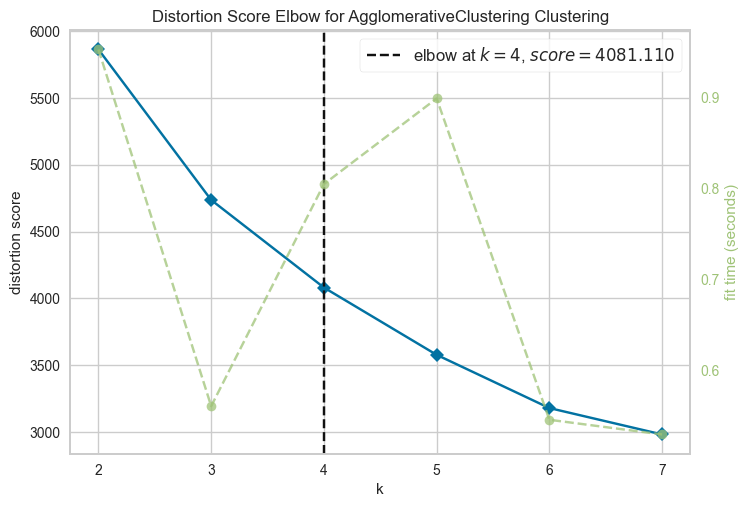

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [458]:
# Display Elbow Method
print('Elbow Method')
Elbow_M = KElbowVisualizer(AC(), k=7)
Elbow_M.fit(data_model_final)
Elbow_M.show()

- Berdasarkan elbow method untuk agglomerative dihasilkan nilai paling optimum adalah `k =4`

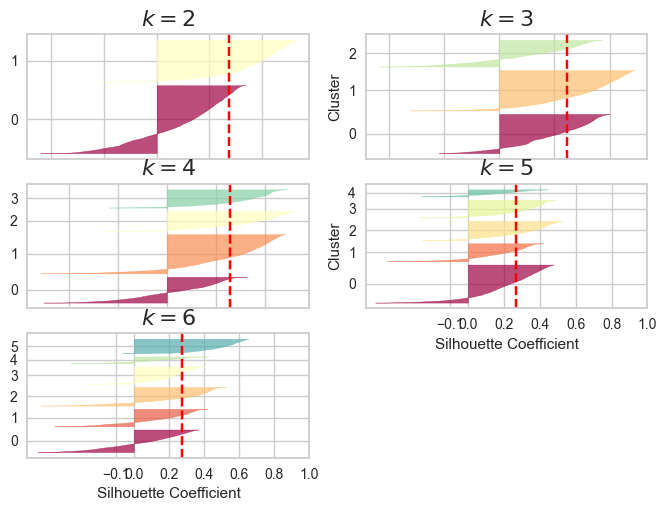

In [459]:
for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = agglo_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_model_final, y_pred)

    padding = len(data_model_final) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- Pada visualisasi terlihat nilai K yang paling baik diantara yang lain untuk mengclustering adalah dengan nilai `K = 5 `

## Spectral Clustering

In [460]:
# Menentukan nilai K
k = [2,3,4,5,6]
spectral_per_k = [SpectralClustering(n_clusters=k, random_state=26).fit(data_model_final)
                  for k in range(1, 7)]

Elbow Method


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


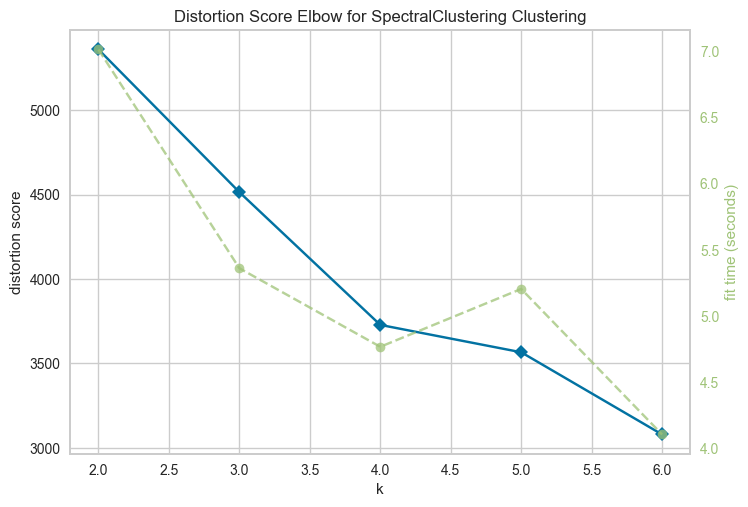

<AxesSubplot: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [461]:
# print elbow graph for k
print('Elbow Method')
Elbow_M = KElbowVisualizer(SpectralClustering(), k=6)
Elbow_M.fit(data_model_final)
Elbow_M.show()

- Pada visualisasi elbow method ditemukan hasil nilai K yang paling optimum adalah 4. karena terjadi patahan dengan nilai yang masih tinggi.

# Data Training

## K-means

In [462]:
kmeans = KMeans(n_clusters = 4, random_state = 17)
kmeans.fit(data_model_final)

KMeans(n_clusters=4, random_state=17)

## Agglomerative

In [463]:
agg = AC(n_clusters = 5)
agg.fit(data_model_final)

AgglomerativeClustering(n_clusters=5)

## Spectral 

In [464]:
spec = SpectralClustering(n_clusters=4, random_state=17)
spec.fit(data_model_final)

SpectralClustering(n_clusters=4, random_state=17)

# Model Evaluation

## PCA

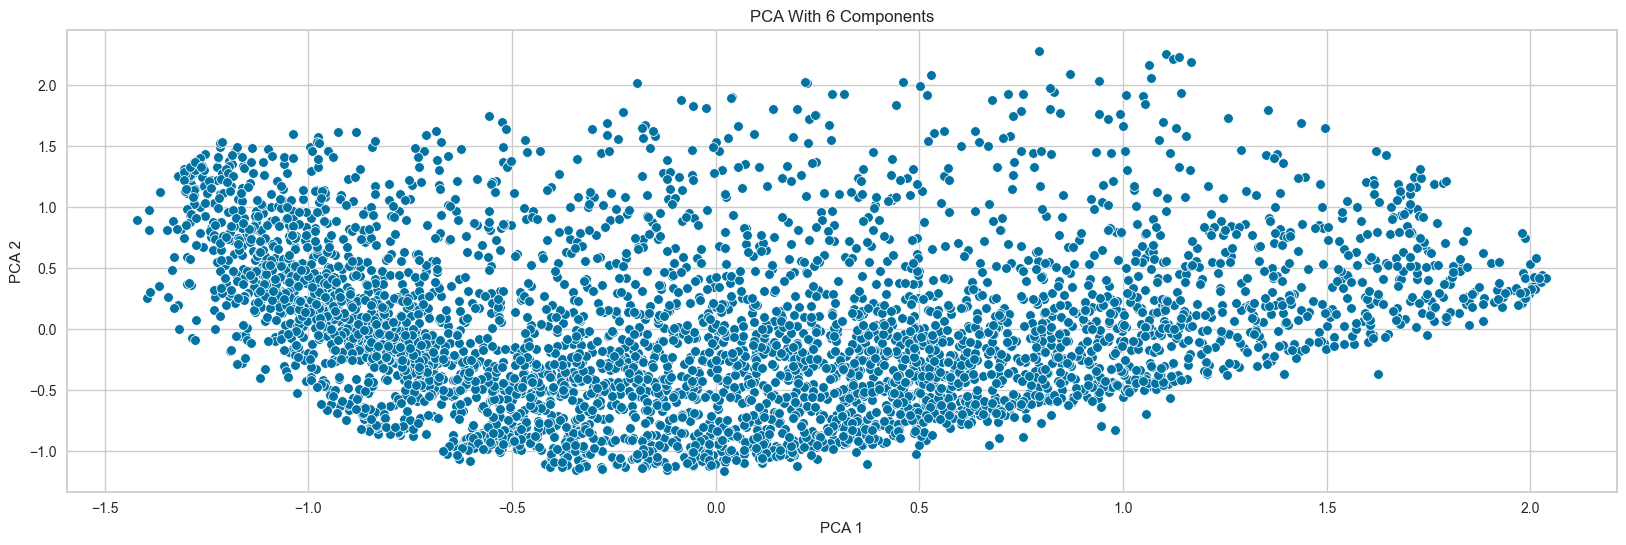

In [465]:
X2D=PCA(n_components=6).fit_transform(data_model_final)

plt.figure(figsize=(20, 6))
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
plt.title('PCA With 6 Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## K-means

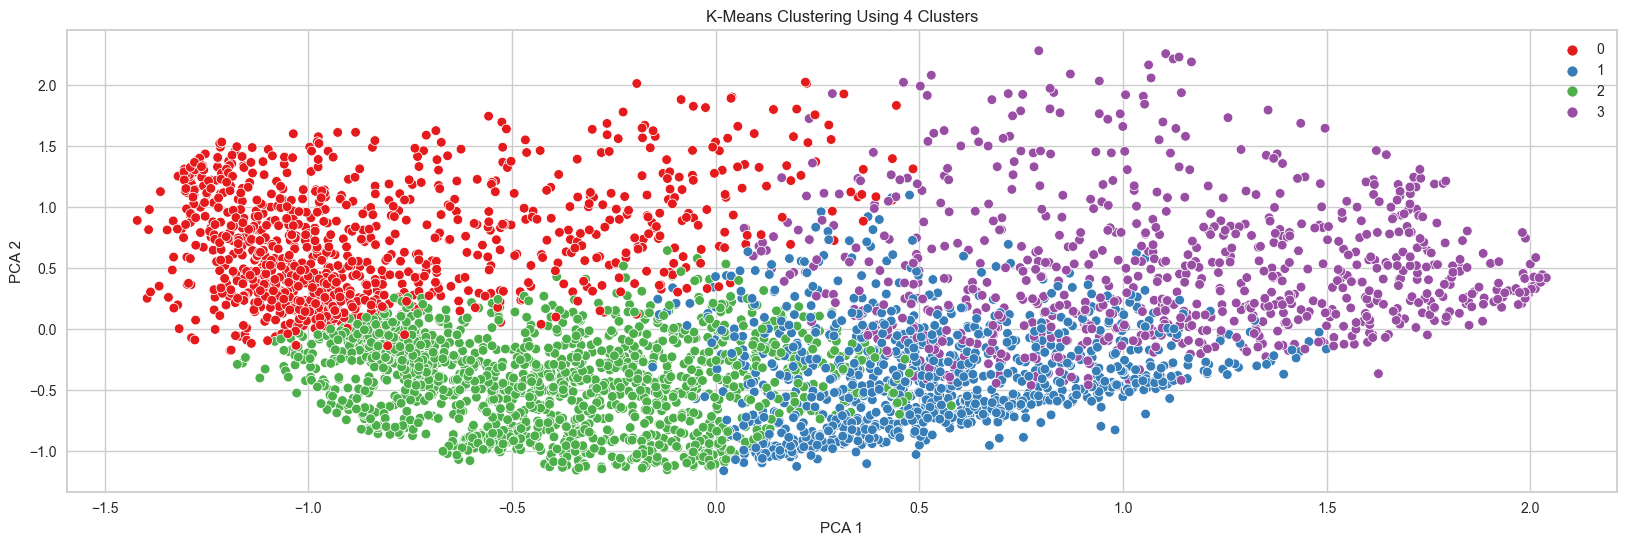

In [466]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=data_model_final, palette='Set1')
plt.title('K-Means Clustering Using 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Agglomerative

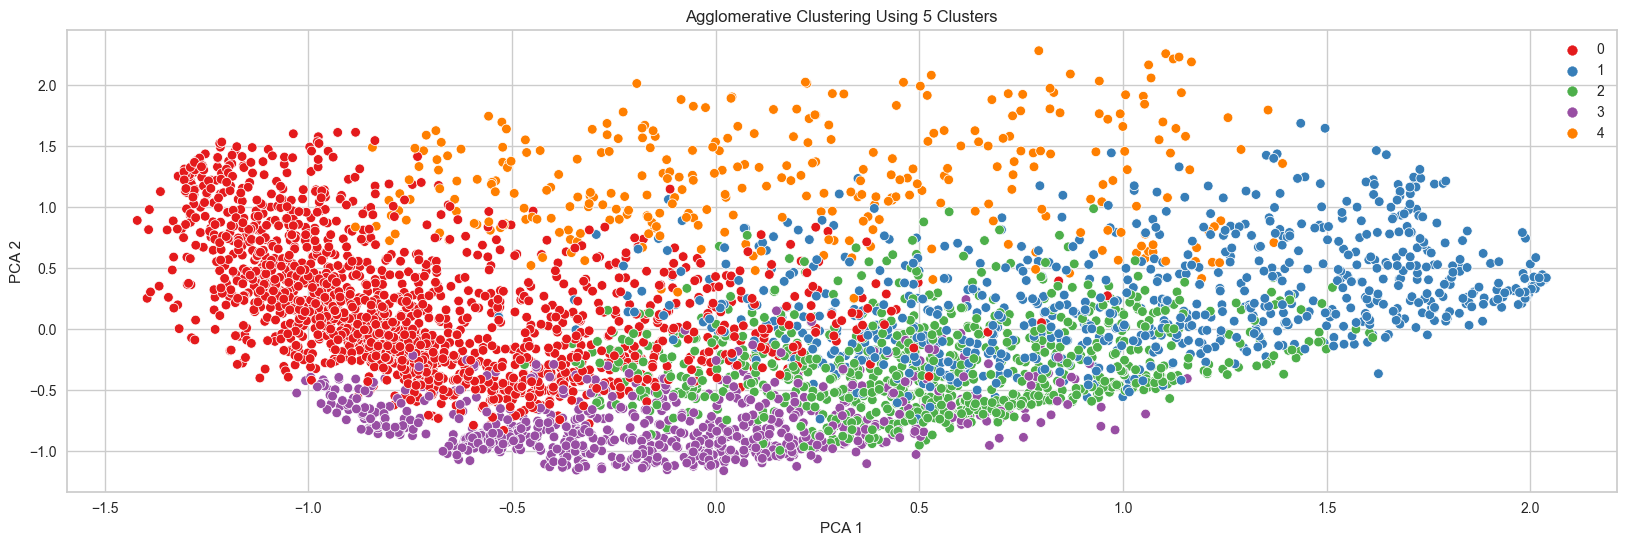

In [467]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agg.labels_, data=data_model_final, palette='Set1')
plt.title('Agglomerative Clustering Using 5 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Spectral

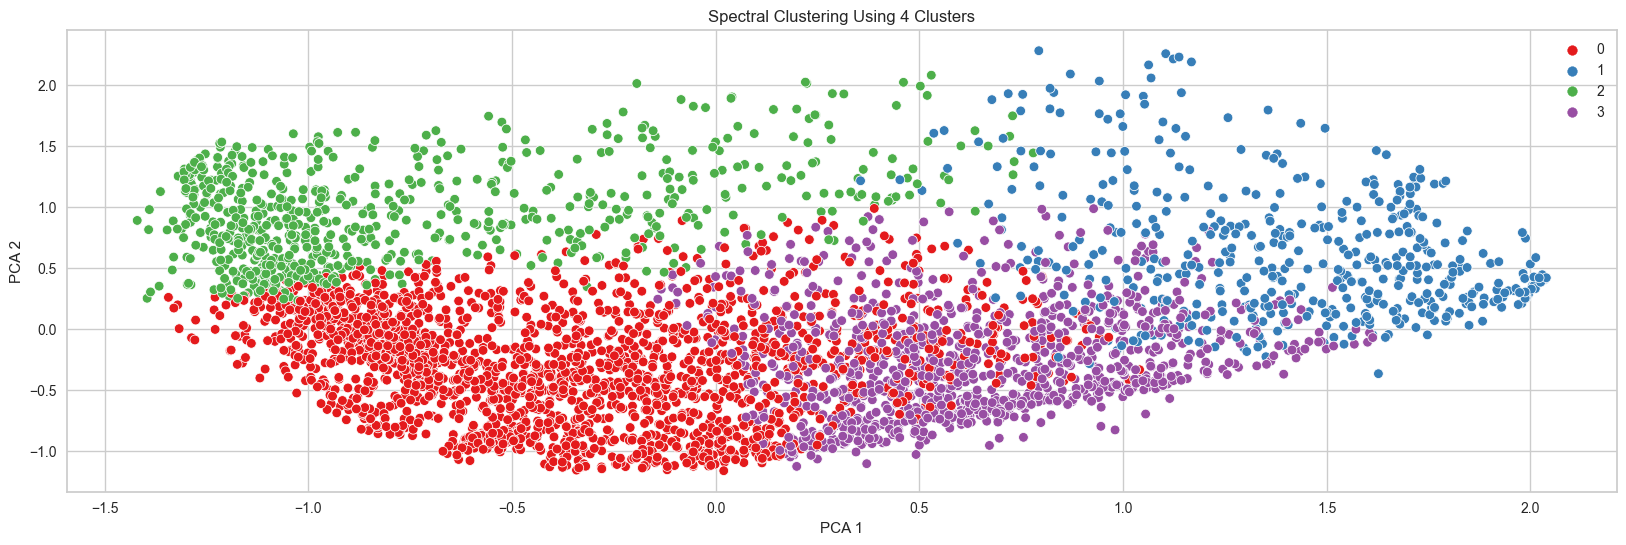

In [468]:


plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=spec.labels_, data=data_model_final, palette='Set1')
plt.title('Spectral Clustering Using 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



## ANALISIS

# Model Inference

In [469]:
# display data inference
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   1526.506915           1.000000      46.67             46.67   
1    916.749476           1.000000     246.82              0.00   
2    535.927055           1.000000       0.00              0.00   
3   2161.715499           0.875000       0.00              0.00   
4   4785.789559           1.000000       0.00              0.00   
5    167.356680           1.000000     288.00            288.00   
6      4.358863           0.181818      70.00             70.00   
7   4210.323012           1.000000    1210.31            139.02   
8    651.394216           1.000000    2529.64           1014.32   
9     63.064197           1.000000    1176.93              0.00   
10    77.325920           1.000000     664.51              0.00   
11    43.865582           0.818182       0.00              0.00   
12  2224.891476           1.000000     211.05            211.05   
13  4613.570499           1.000000       0.00              0.00   
14    30.186422           0.909091     345.99            120.00   
15  2285.604784           1.000000      75.00              0.00   
16    14.042720           0.727273      47.79             47.79   
17   164.649775           1.000000    1764.86           1149.34   
18  6822.877573           1.000000     137.34            137.34   
19   458.958269           0.363636     492.72              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  FREQ_PEMBELIAN  \
0                     0.00      0.000000             0.083333        0.083333   
1                   246.82    925.950908             1.000000        0.000000   
2                     0.00    562.957567             0.000000        0.000000   
3                     0.00   2651.876149             0.000000        0.000000   
4                     0.00   8422.554694             0.000000        0.000000   
5                     0.00    189.705758             0.083333        0.083333   
6                     0.00      0.000000             0.090909        0.090909   
7                  1071.29   1817.321515             1.000000        1.000000   
8                  1515.32      0.000000             1.000000        0.916667   
9                  1176.93      0.000000             1.000000        0.000000   
10                  664.51      0.000000             0.916667        0.000000   
11                    0.00    551.777371             0.000000        0.000000   
12                    0.00   4014.663620             0.333333        0.333333   
13                    0.00   1728.341939             0.000000        0.000000   
14                  225.99      0.000000             0.666667        0.250000   
15                   75.00   2539.047806             0.250000        0.000000   
16                    0.00      0.000000             0.250000        0.083333   
17                  615.52      0.000000             1.000000        0.666667   
18                    0.00   4815.112874             0.083333        0.083333   
19                  492.72      0.000000             1.000000        0.000000   

    FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  PURCHASES_TRX  \
0       0.000000        0.000000                 0              1   
1       0.916667        0.166667                 8             19   
2       0.000000        0.166667                 2              0   
3       0.000000        0.125000                 4              0   
4       0.000000        0.875000                25              0   
5       0.000000        0.083333                 1              3   
6       0.000000        0.000000                 0              1   
7       1.000000        0.166667                 2             52   
8       1.000000        0.000000                 0             83   
9       1.000000        0.000000                 0             23   
10      0.833333        0.000000                 0             11   
11      0.000000        0.083333                 1              0   
1

In [470]:
# scaling for inference
data_inf_scaled = scaler.transform(data_inf)
data_inf_scaled

array([[ 3.09453264e-01,  1.00000000e+00,  1.69792289e-02,
         3.19657534e-02,  0.00000000e+00,  0.00000000e+00,
         8.33330000e-02,  9.99997000e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.43902439e-02,
         1.30952381e-01,  8.13954230e-02,  3.73137752e-01,
         0.00000000e+00,  1.00000000e+00],
       [ 1.85843323e-01,  1.00000000e+00,  8.97967277e-02,
         0.00000000e+00,  2.04672762e-01,  3.37846174e-01,
         1.00000000e+00,  0.00000000e+00,  9.16667000e-01,
         3.66667767e-01,  8.00000000e-01,  4.63414634e-01,
         8.33333333e-02,  3.39611542e-01,  3.66727131e-01,
         0.00000000e+00,  1.00000000e+00],
       [ 1.08643056e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.05402963e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.66667767e-01,  2.00000000e-01,  0.00000000e+00,
         8.33333333e-02,  1.44053778e-01,  1.77722362e-01,
         0.00000000e+00,  1.0

In [471]:
# Pca inf 6 component
pca_inf = PCA(n_components=6)
pca_inf.fit(data_inf_scaled)
pca_value_inf = pca_inf.transform(data_inf_scaled)
print(pca_value_inf)

[[-0.3114845   0.57828524 -0.53034711 -0.84535924  0.15123371 -0.04608676]
 [-0.0230886  -0.33464676  0.12021703 -0.23094763 -0.72369896 -0.61657353]
 [ 0.00806449  0.57478628 -0.53565565 -0.6724103  -0.09552134  0.0262299 ]
 [ 0.54332679  0.67574952 -0.18604007 -0.17287199  0.20904151  0.20386397]
 [ 3.68986514 -0.41138137  0.06902256  0.78449401 -0.22766888  0.35116614]
 [-0.26132439  0.4807248  -0.49840822 -0.71650638 -0.09179186  0.24780304]
 [-0.92724097  2.27737357  0.94581187  0.97051561  0.23229857  0.32473103]
 [-0.32490334 -1.76241679  1.41924057 -0.35434928  0.80153645 -0.39556079]
 [-1.36724084 -1.59755269  1.26362738 -0.70481136 -0.4051688   0.77031123]
 [-1.20045099 -0.8087181  -0.23328421  0.08820926 -0.40890068 -0.29767736]
 [-1.38423257 -0.90627731 -1.39252478  1.00370594  0.0390536  -0.26076439]
 [-0.3486103   0.85711894 -0.39601633 -0.10390963  0.0715697   0.12101402]
 [ 2.15432095 -0.42985422  0.24195574  0.26621126 -0.31492648  0.03566276]
 [ 0.42223024  0.36127876

In [472]:
# Predict inf
y_pred_inf = kmeans.predict(pca_value_inf)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [473]:
# Display predict
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['Prediksi Cluster'])
y_pred_inf_df

Prediksi Cluster
0                  0
1                  2
2                  0
3                  3
4                  3
5                  0
6                  0
7                  2
8                  2
9                  2
10                 2
11                 0
12                 3
13                 1
14                 2
15                 3
16                 0
17                 2
18                 3
19                 0

- pada hasil prediksi menggunakan kmeans pada data inferenc terlihat sudah dapat memberikan cluster pada setiap 20 data


In [474]:
# concate inference
df_final = pd.concat([data_inf, y_pred_inf_df], axis = 1)
df_final

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   1526.506915           1.000000      46.67             46.67   
1    916.749476           1.000000     246.82              0.00   
2    535.927055           1.000000       0.00              0.00   
3   2161.715499           0.875000       0.00              0.00   
4   4785.789559           1.000000       0.00              0.00   
5    167.356680           1.000000     288.00            288.00   
6      4.358863           0.181818      70.00             70.00   
7   4210.323012           1.000000    1210.31            139.02   
8    651.394216           1.000000    2529.64           1014.32   
9     63.064197           1.000000    1176.93              0.00   
10    77.325920           1.000000     664.51              0.00   
11    43.865582           0.818182       0.00              0.00   
12  2224.891476           1.000000     211.05            211.05   
13  4613.570499           1.000000       0.00              0.00   
14    30.186422           0.909091     345.99            120.00   
15  2285.604784           1.000000      75.00              0.00   
16    14.042720           0.727273      47.79             47.79   
17   164.649775           1.000000    1764.86           1149.34   
18  6822.877573           1.000000     137.34            137.34   
19   458.958269           0.363636     492.72              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  FREQ_PEMBELIAN  \
0                     0.00      0.000000             0.083333        0.083333   
1                   246.82    925.950908             1.000000        0.000000   
2                     0.00    562.957567             0.000000        0.000000   
3                     0.00   2651.876149             0.000000        0.000000   
4                     0.00   8422.554694             0.000000        0.000000   
5                     0.00    189.705758             0.083333        0.083333   
6                     0.00      0.000000             0.090909        0.090909   
7                  1071.29   1817.321515             1.000000        1.000000   
8                  1515.32      0.000000             1.000000        0.916667   
9                  1176.93      0.000000             1.000000        0.000000   
10                  664.51      0.000000             0.916667        0.000000   
11                    0.00    551.777371             0.000000        0.000000   
12                    0.00   4014.663620             0.333333        0.333333   
13                    0.00   1728.341939             0.000000        0.000000   
14                  225.99      0.000000             0.666667        0.250000   
15                   75.00   2539.047806             0.250000        0.000000   
16                    0.00      0.000000             0.250000        0.083333   
17                  615.52      0.000000             1.000000        0.666667   
18                    0.00   4815.112874             0.083333        0.083333   
19                  492.72      0.000000             1.000000        0.000000   

    FREQ_CICILAN  FREQ_UANG_MUKA  CASH_ADVANCE_TRX  PURCHASES_TRX  \
0       0.000000        0.000000                 0              1   
1       0.916667        0.166667                 8             19   
2       0.000000        0.166667                 2              0   
3       0.000000        0.125000                 4              0   
4       0.000000        0.875000                25              0   
5       0.000000        0.083333                 1              3   
6       0.000000        0.000000                 0              1   
7       1.000000        0.166667                 2             52   
8       1.000000        0.000000                 0             83   
9       1.000000        0.000000                 0             23   
10      0.833333        0.000000                 0             11   
11      0.000000        0.083333                 1              0   
1

### Eda Inf

<AxesSubplot: xlabel='Prediksi Cluster', ylabel='count'>

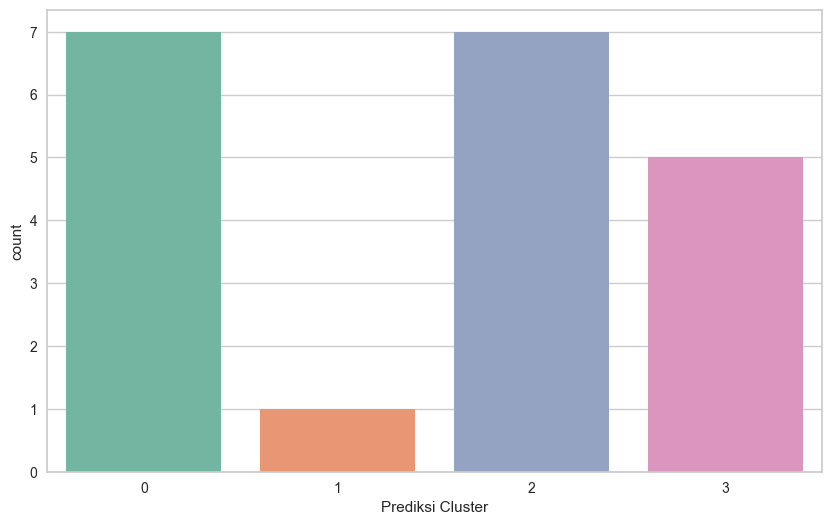

In [480]:
#display eda inf

plt.figure(figsize=(10,6))
sns.countplot(data = df_final, x='Prediksi Cluster', palette = 'Set2')



- Berikut adalah visualisasi dari predicti clustering untuk data inference dimana nilai untuk `cluster 0 dan 2` memiliki jumlah yang sama yaitu `7 data` sedangkan untuk `cluster 1` hanya dimiliki oleh `1 data` dan untuk `cluster 3` terdapat pada `5 data`. Sehingga 20 data telah digolongkan pada cluster mana setiap data tersebut. hal ini lah yang disebut dengan `customer segmentation` dimina memberikan cluster pada setiap customor id pada bank berdasarkan nilai feature-featurenya.

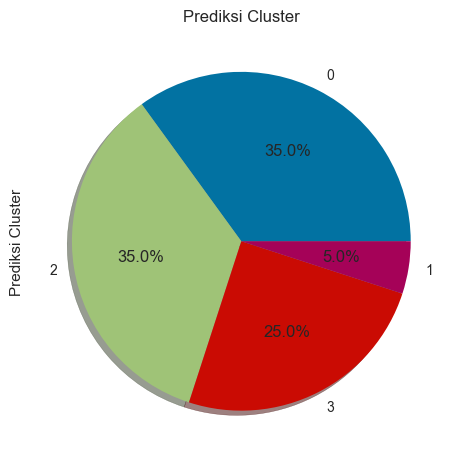

In [483]:

df_final['Prediksi Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Prediksi Cluster')
plt.show()

- Pada `pie chart` didapatkan bahwa customer yang masuk ke dalam `cluster 0 dan 2` sama jumlahnya dengan nilai sebesar `35%` disusul dengan `cluster 3` sebesar `25%` dan pada `cluster 1` sebesar `5%`.

# Kesimpulan

Data ini berisikan tentang record penggunaan dari kartu kredit yang dimiliki oleh setiap customer pada suatu bank pada 6 bulan terakhir. pada data ini dapat dilihat bahwa rata-rata dari customer memiliki saldo yang terisi untuk melakukan pembelian sebesar `1565 dollar` dan untuk jangka waktu layanan yang paling sebentar adalah 6 bulan dan jangka paling lamanya adalah `1 tahun`. Sedangkan untuk limit dari credit card yang dimiliki oleh customer yang diberikan oleh bank paling sedikit adalah `150 dollar` dan paling banyak adalah `30000 dollar`.
Rata-rata dari customer id memiliki pembelian yang sedikit walau memiliki sisa saldo yang tinggi maupun rendah. Jumlah limit yang diberikan oleh bank rata-rata sebesar `4494 dollar`. Serta rata-rata dari pembayaran yang dilakukan oleh customer bank adalah `1726 dollar`. Sedangkan untuk uang muka rata-rata customer melakukan sebanyak `3 transaksi`. Untuk jangka waktu pelyanan yang diberikan oleh bank kepada customer rata rata berada di `12 bulan`.

Dengan data yang sudah di processing dengan feature selection yang membuang kolom yang tidak berkorelasi, melakukan pemisahan data untuk inference, melakukan scaling dan dilakukan `reduksi dimensi` menggunakan PCA dan nilai VIF.

Dengan mereduksi data menjadi 6 feature, data ini masih membawa informasi sebesar `95%` dari data asli nya. Sehingga model yang digunakan masih tergolong valid jika menggunakan `6 features`.

Setelah itu dilakukan `clustering` menggunakan 3 model clustering yaitu `Kmeans, Agglomerative dan Spectral`. Mencari jumlah clustering yang tepat menggunakan beberapa model tersebut dan didapatkan hasil.

Untuk `Kmeans` didapatkan clustering sebanyak `4 cluster`. Untuk model `Agglomerative` didapatkan cluster sebanyak `5 cluster`. Sedangkan untuk `Spectral` didapatkan cluster sebanyak `4 cluster`.

Setelah ditemukan jumlah cluster pada setiap model dilakukan visualisasi menggunakan `scatter plot` dan ditemukan bahwa model `kmeans` lebih baik dalam hal clustering untuk data set ini. Sehingga model clustering `kmeans` digunakan untuk memprediksi cluster pada data inference.
cluster 0 memiliki arti 

Didapatkan hasil dari 20 data semuanya dapat di prediksi oleh model kmeans. Dengan `7 data` masuk `cluster 0`, `1 data` masuk `cluster 1`, `7 data` masuk `cluster 3` dan `5 data` masuk kedalam `cluster 3`. Dan untuk persentasinya model kmeans `35% untuk cluster 0 dan 2`, `25% untuk cluster 3` dan `5% untuk cluster 1`.



# Conceptual Problems:

Jawab pertanyaan berikut:

    Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
    Apakah fungsi dari pruning pada Tree model?
    Bagaimana cara memilih K yang optimal pada KNN?
    Jelaskan apa yang kalian ketahui tentang Cross Validation!
    Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
